In [1]:
import numpy as np
import pandas as pd
def periodOfMonth(datetime):
    '''
    :param datetime: 输入时间
    :return: 输出0,1,2 分别代表上中下旬
    '''
    day = datetime.day
    if day <= 10:
        return 0
    elif 10 < day <= 20:
        return 1
    else:
        return 2

def generateDateFeature(df):
    '''
    时间特征处理函数
    :param df:
    :return:返回处理后加上时间特征的df
    '''
    df['date'] = df['date'].apply(lambda x: parse(str(x)))
    df['dayOfWeek'] = df['date'].apply(lambda x: x.isoweekday())  # 该周的第几天
    df['periodOfMonth'] = df['date'].apply(periodOfMonth)
    df['day'] = df['date'].apply(lambda x: x.day)

In [2]:
#date_df = pd.read_csv("atec_anti_fraud_train.csv",usecols=['date','label','f7','f82','f85','f210','f238'])   #模型选择的重要特征列
date_df = pd.read_csv("atec_anti_fraud_train.csv") 
list = np.where(date_df.label == -1)  # 删除-1的行，当监督学习
date_df.drop(date_df.index[list], inplace=True)
from datetime import datetime
from dateutil.parser import parse
date_df['date'] = date_df['date'].apply(lambda x : parse(str(x)))
generateDateFeature(date_df)

In [3]:
date_df.head()

,id,label,date,f1,f2,f3,f4,f5,f6,f7,...,f291,f292,f293,f294,f295,f296,f297,dayOfWeek,periodOfMonth,day
0,f10eb20f31cf7063ee8bdbd1272214e4d7e0193c8dbce4...,0,2017-11-03,0,0,0,0,100807.0,0,5,...,85.0,302.0,201.0,203.0,203.0,61.0,201.0,5,0,3
1,d861929b67938d06538b910b9f6b85f5eb62b6ad7361ba...,0,2017-09-17,0,1,1,1,100805.0,1,5,...,13.0,302.0,160.0,160.0,161.0,8.0,160.0,7,1,17
2,1270cb8a85eedd57672b2c6297fa5633e36773a2c3a351...,0,2017-10-22,0,0,1,0,100102.0,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,22
3,9fa009724ee7ff9d688ae321304fbc78f608cdabbfdd2b...,0,2017-10-29,0,0,0,1,100807.0,1,4,...,57.0,251.0,175.0,176.0,176.0,49.0,150.0,7,2,29
4,1da482485d7e8bcefae7e9d0d1167cec3ac111cfa71d8b...,0,2017-10-02,1,1,0,1,100805.0,1,5,...,74.0,302.0,182.0,181.0,182.0,51.0,181.0,1,0,2


In [4]:
sorted(pd.unique(date_df.date.values))  #每一天都有数据

[numpy.datetime64('2017-09-05T00:00:00.000000000'),
 numpy.datetime64('2017-09-06T00:00:00.000000000'),
 numpy.datetime64('2017-09-07T00:00:00.000000000'),
 numpy.datetime64('2017-09-08T00:00:00.000000000'),
 numpy.datetime64('2017-09-09T00:00:00.000000000'),
 numpy.datetime64('2017-09-10T00:00:00.000000000'),
 numpy.datetime64('2017-09-11T00:00:00.000000000'),
 numpy.datetime64('2017-09-12T00:00:00.000000000'),
 numpy.datetime64('2017-09-13T00:00:00.000000000'),
 numpy.datetime64('2017-09-14T00:00:00.000000000'),
 numpy.datetime64('2017-09-15T00:00:00.000000000'),
 numpy.datetime64('2017-09-16T00:00:00.000000000'),
 numpy.datetime64('2017-09-17T00:00:00.000000000'),
 numpy.datetime64('2017-09-18T00:00:00.000000000'),
 numpy.datetime64('2017-09-19T00:00:00.000000000'),
 numpy.datetime64('2017-09-20T00:00:00.000000000'),
 numpy.datetime64('2017-09-21T00:00:00.000000000'),
 numpy.datetime64('2017-09-22T00:00:00.000000000'),
 numpy.datetime64('2017-09-23T00:00:00.000000000'),
 numpy.datet

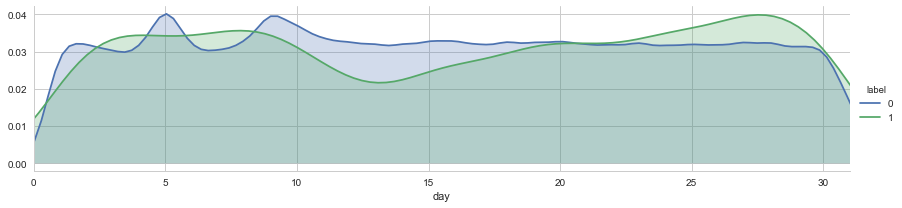

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
facet = sns.FacetGrid(date_df, hue="label",aspect=4)
facet.map(sns.kdeplot,'day',shade= True)
facet.set(xlim=(0, date_df['day'].max()))
facet.add_legend()

## 按day将负样本比例作为特征 ##

In [6]:
grouped1 = date_df['label'].groupby(date_df['day'])

In [7]:
grouped1.value_counts().unstack().iloc[:,1].values

array([360, 440, 429, 448, 409, 341, 485, 420, 504, 369, 314, 270, 195,
       220, 351, 356, 285, 349, 413, 430, 362, 396, 321, 521, 449, 303,
       663, 433, 525, 437, 324], dtype=int64)

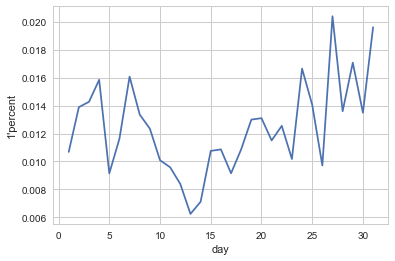

In [8]:
arr1 = pd.DataFrame(grouped1.value_counts().unstack().iloc[:,1]).values.astype('float64') + pd.DataFrame(grouped1.value_counts().unstack().iloc[:,0]).values.astype('float64')
arr2 = pd.DataFrame(grouped1.value_counts().unstack().iloc[:,1]).values.astype('float64')
percent = arr2/arr1
day = np.arange(31)+1
plt.plot(day,percent)
plt.xlabel('day')
plt.ylabel("1'percent")

## 按星期查看﹣样本比例 ##

In [9]:
grouped2 = date_df['label'].groupby(date_df['dayOfWeek'])
grouped2.value_counts().unstack().iloc[:,1]

dayOfWeek
1    1706
2    1709
3    1625
4    1512
5    1950
6    1819
7    1801
Name: 1, dtype: int64

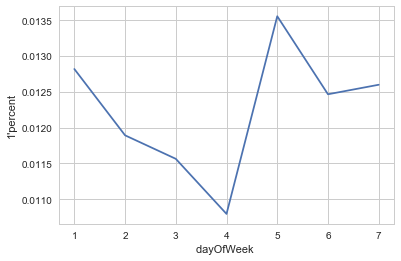

In [10]:
arr1 = pd.DataFrame(grouped2.value_counts().unstack().iloc[:,1]).values.astype('float64') + pd.DataFrame(grouped2.value_counts().unstack().iloc[:,0]).values.astype('float64')
arr2 = pd.DataFrame(grouped2.value_counts().unstack().iloc[:,1]).values.astype('float64')
percent = arr2/arr1
dayOfWeek = np.arange(7)+1
plt.plot(dayOfWeek ,percent)
plt.xlabel('dayOfWeek ')
plt.ylabel("1'percent")

In [30]:
grouped2 = date_df['label'].groupby(date_df['f85'])
grouped2.value_counts().unstack().iloc[:,1]

f85
0.0           2.0
0.1           2.0
0.2           2.0
0.3           3.0
0.4           3.0
0.5           NaN
0.6           NaN
0.7           NaN
0.8           NaN
0.9           NaN
1.0          13.0
1.1           1.0
1.2           3.0
1.3           5.0
1.4           4.0
1.5           NaN
1.6           NaN
1.7           NaN
1.8           1.0
1.9           9.0
2.0           6.0
2.1           NaN
2.2           1.0
2.3           NaN
2.4           NaN
2.5           NaN
2.6           NaN
2.7           NaN
2.8           NaN
2.9          12.0
             ... 
900750.0      NaN
906556.8      NaN
919555.8      NaN
932556.8      NaN
942556.8      NaN
955556.8      NaN
968555.8      NaN
981555.8      NaN
994556.8      NaN
1007555.8     NaN
1037521.8     NaN
1037526.8     NaN
1042526.8     NaN
1067551.8     NaN
1068532.8     NaN
1078562.8     NaN
1098561.8     NaN
1113562.8     NaN
1123561.8     NaN
1126072.8     NaN
1149562.8     NaN
1154562.8     NaN
1173562.8     NaN
1203591.8     NaN
125050

In [22]:
def plotNegativeSamplesPercent_By_UniqueInstances2(df,col):
    grouped = df['label'].groupby(df[col])
    arr1 = pd.DataFrame(grouped.value_counts().unstack().iloc[:,1]).values.astype('float64') + pd.DataFrame(grouped.value_counts().unstack().iloc[:,0]).values.astype('float64')
    arr2 = pd.DataFrame(grouped.value_counts().unstack().iloc[:,1]).values.astype('float64')
    Y_percent = arr2/arr1
    X_uniqueinstances = grouped.value_counts().unstack().iloc[:,1].index
    plt.plot(X_uniqueinstances ,Y_percent)
    plt.xlabel(col)
    plt.ylabel("NegativeSamplesPercent")

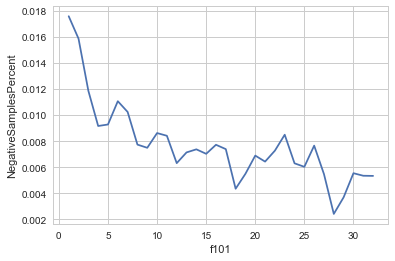

In [83]:
plotNegativeSamplesPercent_By_UniqueInstances2(date_df,'f101')

In [32]:
def plotNegativeSamplesPercent_By_UniqueInstances1(df,col):
    grouped = df['label'].groupby(df[col])
    arr1 = pd.DataFrame(grouped.value_counts().unstack().iloc[:,1]).values.astype('float64') + pd.DataFrame(grouped.value_counts().unstack().iloc[:,0]).values.astype('float64')
    arr2 = pd.DataFrame(grouped.value_counts().unstack().iloc[:,1]).values.astype('float64')
    Y_percent = arr2/arr1
    X_uniqueinstances = grouped.value_counts().unstack().iloc[:,1].index
    facet = sns.FacetGrid(df, hue="label",aspect=4)
    facet.map(sns.kdeplot,col,shade= True)
    facet.set(xlim=(0,df[col].max()))
    facet.add_legend()

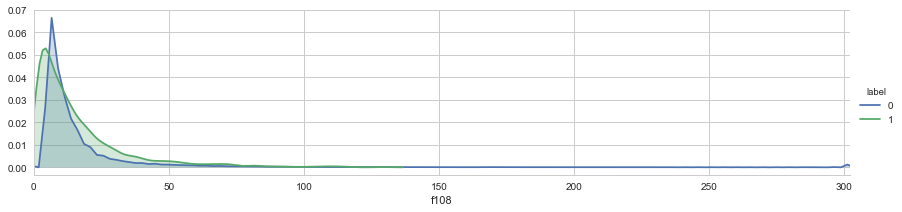

In [33]:
plotNegativeSamplesPercent_By_UniqueInstances1(date_df,'f108')

In [135]:
def plotNegativeSamplesPercent_By_UniqueInstances(df,col):
    fig, axis = plt.subplots(1,1,figsize=(18,4))
    average = df[[col, 'label']].groupby([col],as_index=False).mean()
    sns.barplot(x=col, y='label', data=average)
    #print date_df[col].value_counts()

2.0     32773
3.0     31597
4.0     30333
5.0     29848
6.0     28461
7.0     27432
8.0     27013
9.0     26294
10.0    25630
11.0    25195
12.0    24705
13.0    23677
14.0    23460
15.0    22475
16.0    21881
17.0    21245
18.0    21149
27.0    20481
19.0    20190
20.0    20019
26.0    19847
21.0    19745
31.0    19636
22.0    19115
23.0    19069
28.0    19026
24.0    18885
25.0    18732
30.0    18224
29.0    17868
1.0     16944
32.0    10309
Name: f101, dtype: int64


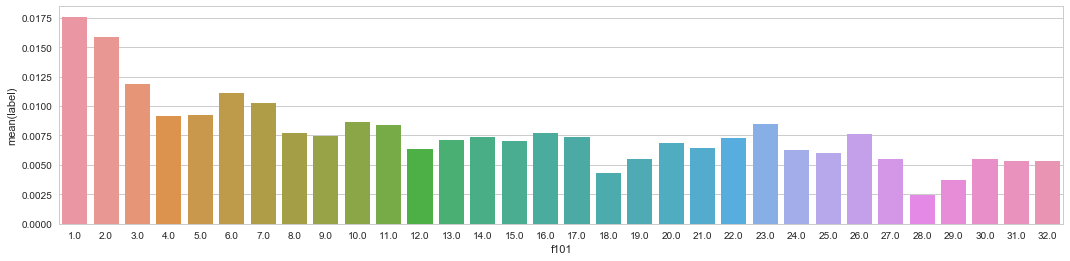

In [104]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f101')

1.0     383407
0.0     378379
2.0       5837
31.0      4100
32.0      3163
30.0      1215
3.0        864
4.0        488
11.0       385
20.0       299
7.0        296
14.0       291
5.0        290
12.0       288
10.0       287
16.0       283
21.0       283
27.0       279
26.0       276
19.0       272
9.0        259
22.0       255
25.0       252
28.0       252
24.0       243
23.0       242
29.0       238
6.0        225
15.0       216
18.0       213
17.0       211
13.0       195
8.0        188
Name: f24, dtype: int64


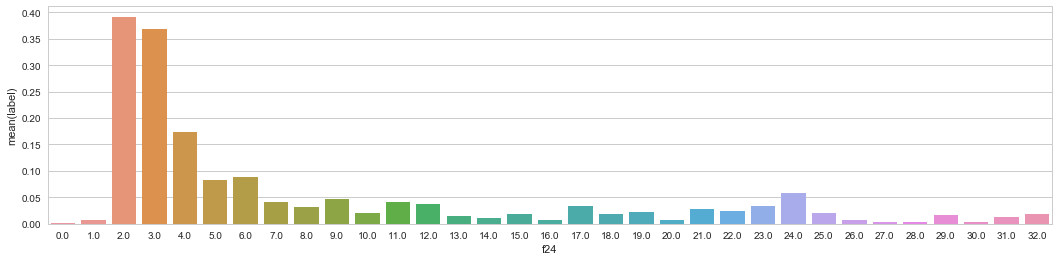

In [106]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f24')

1.0     384096
0.0     377130
2.0       6306
3.0        930
4.0        518
54.0       412
48.0       407
11.0       399
42.0       377
49.0       356
47.0       335
7.0        331
55.0       329
40.0       310
14.0       305
20.0       297
27.0       297
61.0       293
62.0       288
12.0       281
34.0       280
19.0       278
45.0       278
5.0        278
10.0       277
25.0       275
46.0       271
43.0       267
21.0       266
16.0       266
         ...  
39.0       251
22.0       251
23.0       249
9.0        246
26.0       245
29.0       242
58.0       232
30.0       231
17.0       231
33.0       230
50.0       229
28.0       228
32.0       226
59.0       220
38.0       219
15.0       215
41.0       215
18.0       212
53.0       209
35.0       208
8.0        207
57.0       200
6.0        195
13.0       178
36.0       162
51.0       162
56.0       138
63.0       135
52.0       128
44.0       109
Name: f25, Length: 64, dtype: int64


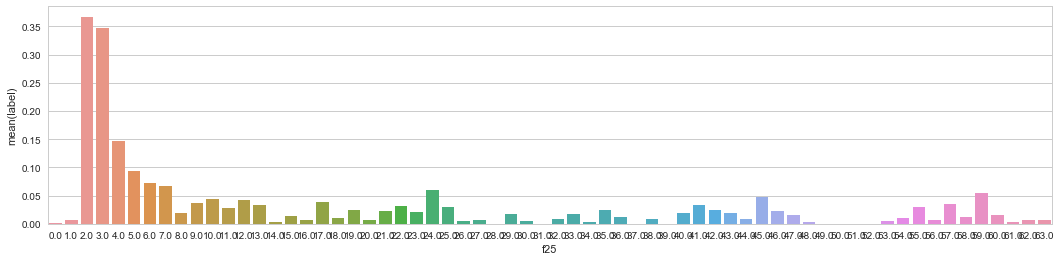

In [107]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f25')

1.0     389455
0.0     384721
2.0       5949
3.0        366
4.0         60
5.0         27
6.0         10
7.0          5
10.0         2
12.0         1
13.0         1
11.0         1
8.0          1
9.0          1
Name: f28, dtype: int64


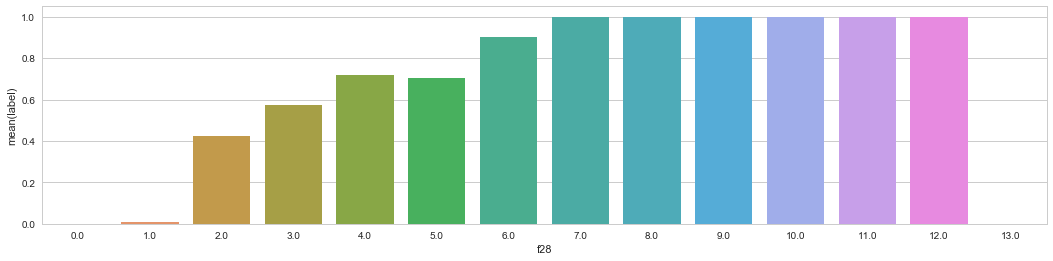

In [108]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f28')

6    179103
4    157159
2    155552
7    143977
3    141636
5    127107
1     81880
0      3592
Name: f7, dtype: int64


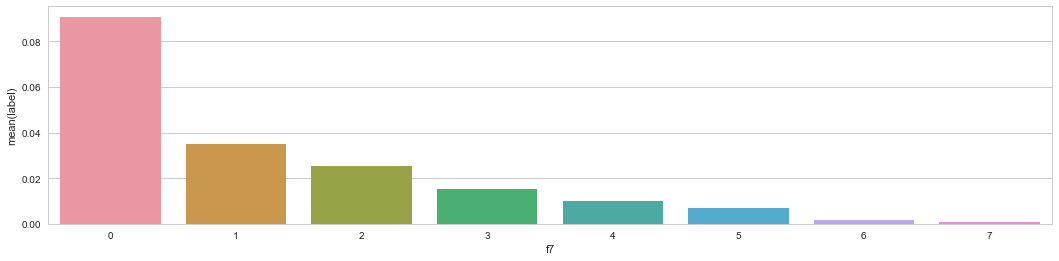

In [110]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f7')

2.0      22936
3.0      21562
4.0      20316
5.0      19566
6.0      18551
7.0      18111
8.0      17411
9.0      16666
10.0     16160
11.0     15750
12.0     15038
13.0     14523
14.0     14236
15.0     13473
16.0     13188
17.0     12698
18.0     12393
19.0     12097
1.0      11924
20.0     11703
21.0     11312
22.0     11035
23.0     10702
24.0     10282
25.0     10002
26.0      9818
27.0      9511
29.0      9048
28.0      9014
30.0      8752
         ...  
394.0        3
402.0        3
416.0        2
426.0        2
413.0        2
411.0        2
404.0        2
407.0        2
429.0        2
423.0        2
390.0        2
435.0        2
377.0        2
432.0        2
382.0        2
431.0        1
417.0        1
421.0        1
424.0        1
400.0        1
419.0        1
418.0        1
422.0        1
414.0        1
434.0        1
409.0        1
427.0        1
406.0        1
408.0        1
436.0        1
Name: f210, Length: 427, dtype: int64


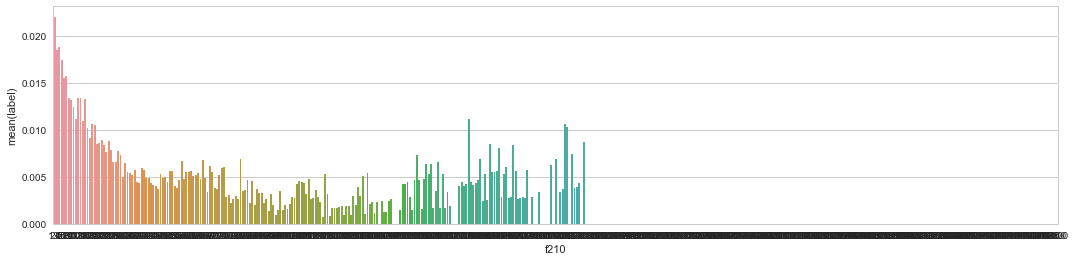

In [112]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f210')

2.0      378475
1.0      338436
3.0       53004
4.0       22009
5.0       12876
6.0        9219
7.0        6777
8.0        5592
9.0        4482
10.0       3673
301.0      3504
302.0      3493
11.0       3230
12.0       2663
13.0       2365
14.0       2236
15.0       2027
16.0       1924
17.0       1810
18.0       1704
19.0       1666
20.0       1637
22.0       1593
21.0       1591
23.0       1469
24.0       1375
34.0       1374
40.0       1364
25.0       1361
27.0       1352
          ...  
643.0         1
621.0         1
622.0         1
623.0         1
642.0         1
638.0         1
625.0         1
635.0         1
627.0         1
682.0         1
683.0         1
686.0         1
577.0         1
553.0         1
557.0         1
632.0         1
628.0         1
570.0         1
624.0         1
573.0         1
608.0         1
672.0         1
596.0         1
688.0         1
586.0         1
590.0         1
702.0         1
701.0         1
699.0         1
568.0         1
Name: f238, Length: 666,

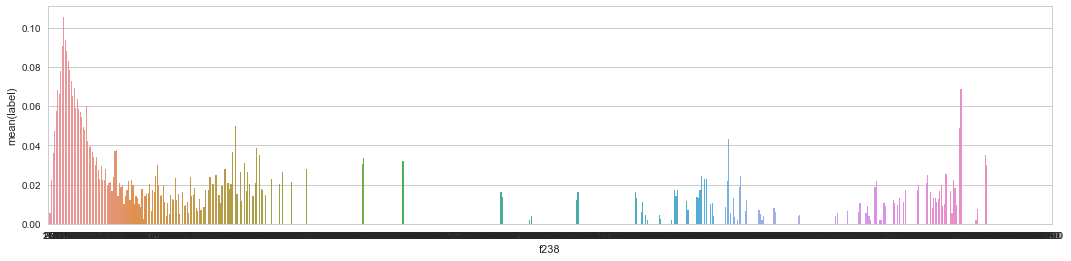

In [113]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f238')

1    471497
0    428012
2     59535
3     22777
4      8185
Name: f6, dtype: int64


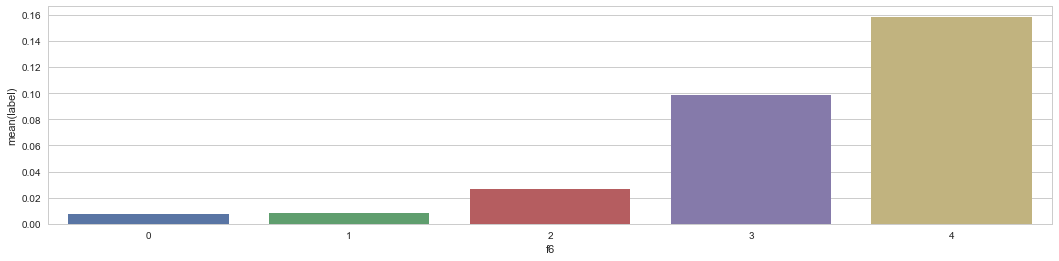

In [115]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f6')

1    495090
0    383313
2    111603
Name: f1, dtype: int64


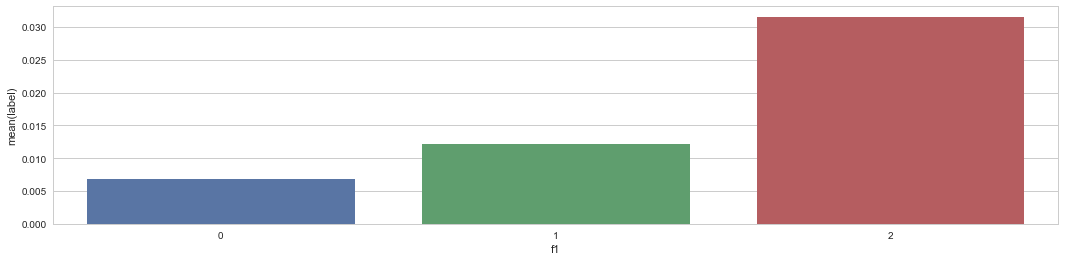

In [116]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f1')

1    495509
0    494316
2       181
Name: f2, dtype: int64


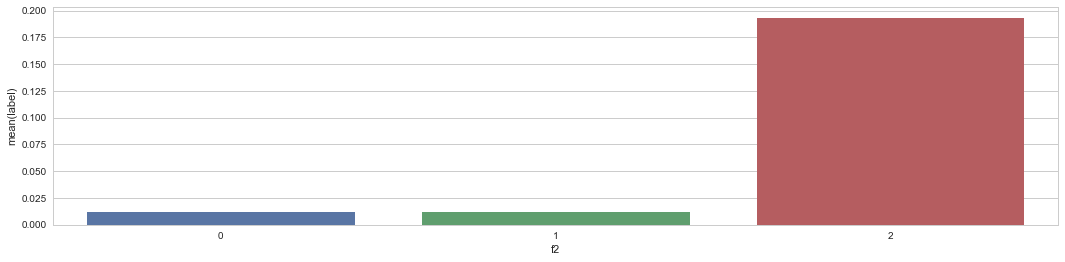

In [117]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f2')

1    494302
0    396964
2     98740
Name: f3, dtype: int64


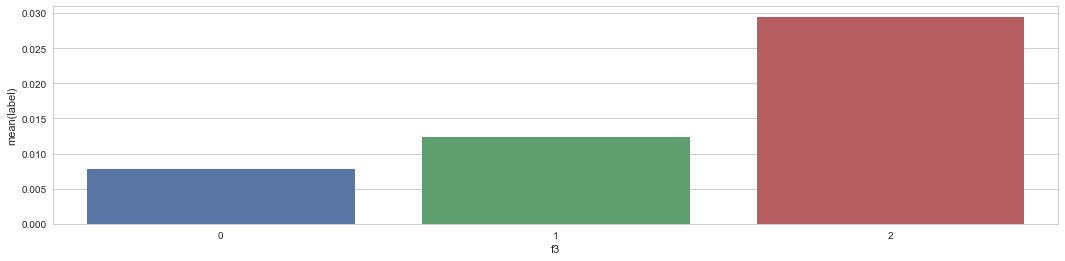

In [118]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f3')

1    495372
0    482556
2     12078
Name: f4, dtype: int64


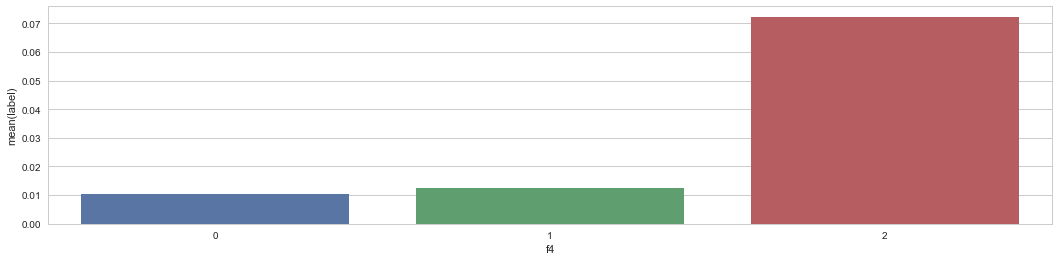

In [119]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f4')

100805.0    184772
100806.0    164545
100803.0    105153
100802.0     86760
100804.0     82149
100807.0     33084
100801.0     17651
100102.0     13033
100103.0     12808
100800.0      7331
100610.0      6555
100608.0      5723
100609.0      5497
100100.0      5138
100607.0      5122
100101.0      5099
100704.0      4475
100020.0      3132
100106.0      3103
100105.0      3029
100021.0      2672
100705.0      2605
100329.0      2415
100328.0      2360
100703.0      1928
100701.0      1792
100611.0      1506
100325.0      1430
100702.0      1364
100326.0      1179
             ...  
100200.0         1
80204.0          1
10905.0          1
80107.0          1
50403.0          1
60305.0          1
60001.0          1
60000.0          1
60503.0          1
60602.0          1
60603.0          1
60604.0          1
50809.0          1
50808.0          1
60707.0          1
50404.0          1
60905.0          1
80106.0          1
61006.0          1
61007.0          1
50000.0          1
10909.0     

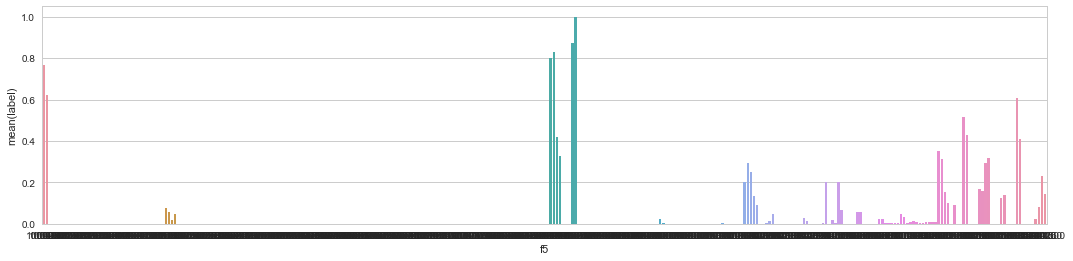

In [120]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f5')

1    495379
2    447533
0     47094
Name: f8, dtype: int64


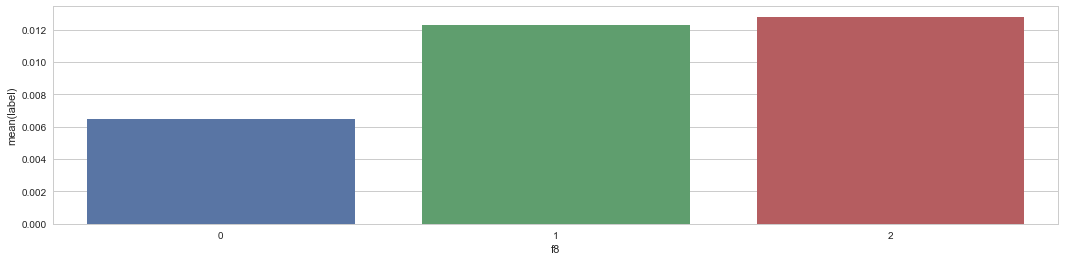

In [121]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f8')

1    495080
0    441667
2     53259
Name: f9, dtype: int64


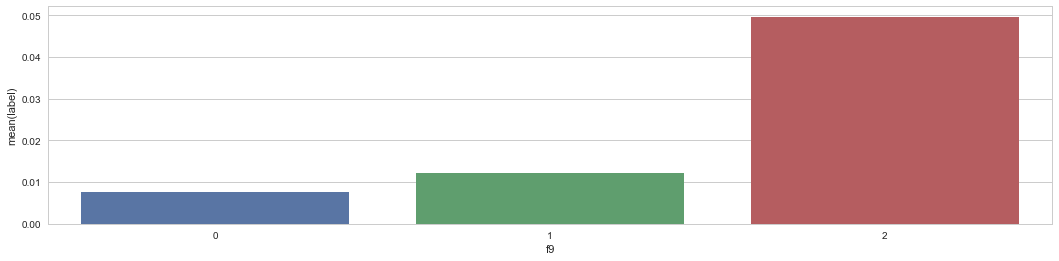

In [122]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f9')

1    495326
0    310805
2    183875
Name: f10, dtype: int64


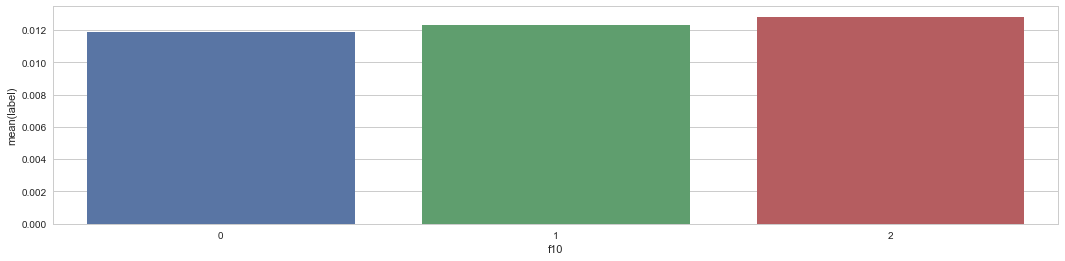

In [123]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f10')

1    494102
0    421025
2     74879
Name: f11, dtype: int64


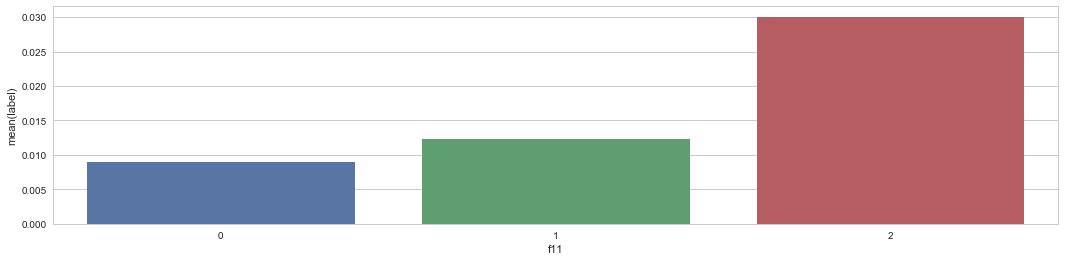

In [124]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f11')

1    495309
2    385376
0    109321
Name: f12, dtype: int64


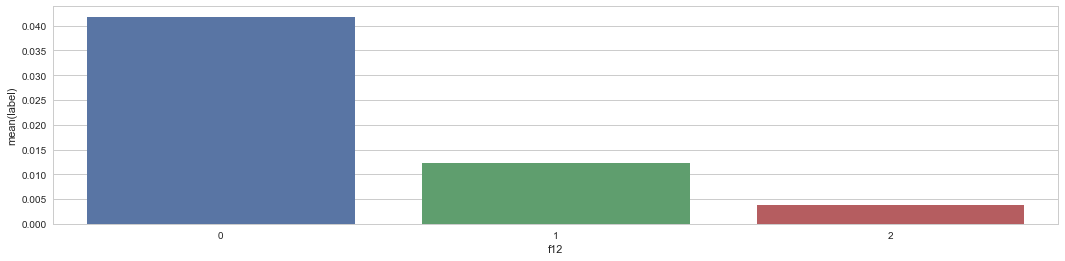

In [125]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f12')

1    495103
0    271218
2    223685
Name: f13, dtype: int64


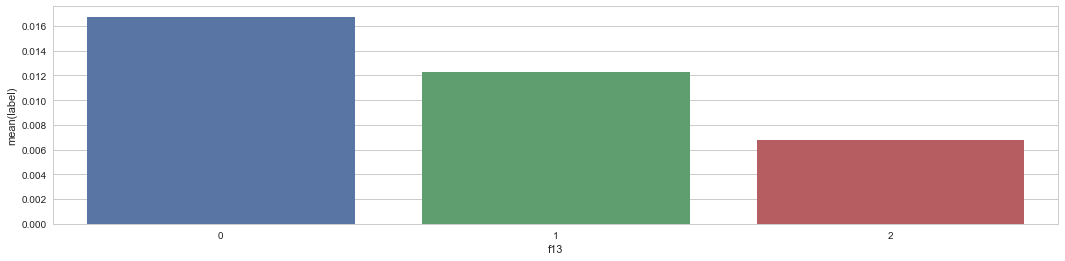

In [126]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f13')

1    494940
2    379550
0    115516
Name: f14, dtype: int64


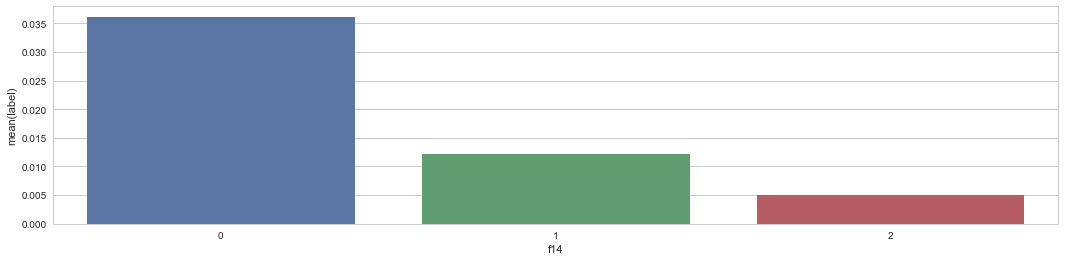

In [127]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f14')

1    495071
2    256682
0    238253
Name: f15, dtype: int64


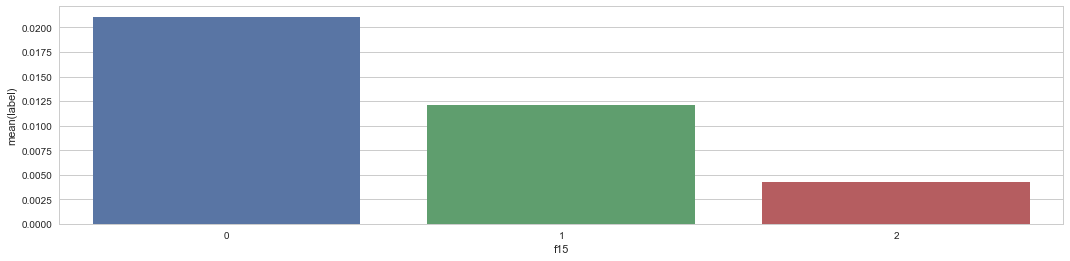

In [128]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f15')

1    494639
2    254550
0    240817
Name: f16, dtype: int64


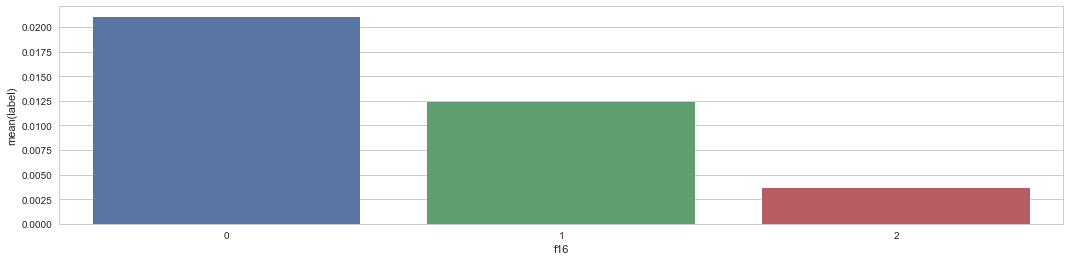

In [129]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f16')

1    495146
2    392076
0    102784
Name: f17, dtype: int64


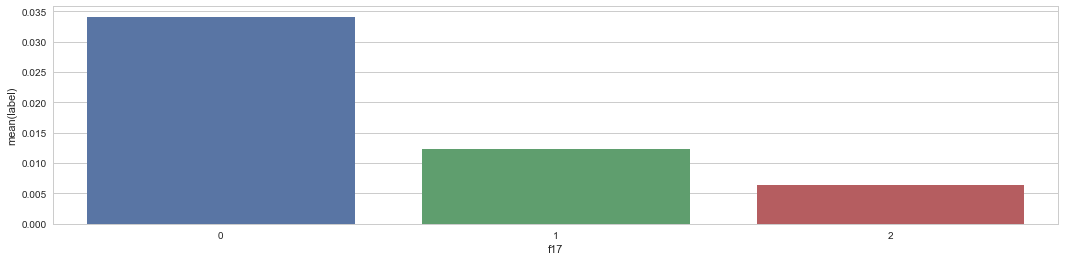

In [130]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f17')

1    495232
2    431110
0     63664
Name: f18, dtype: int64


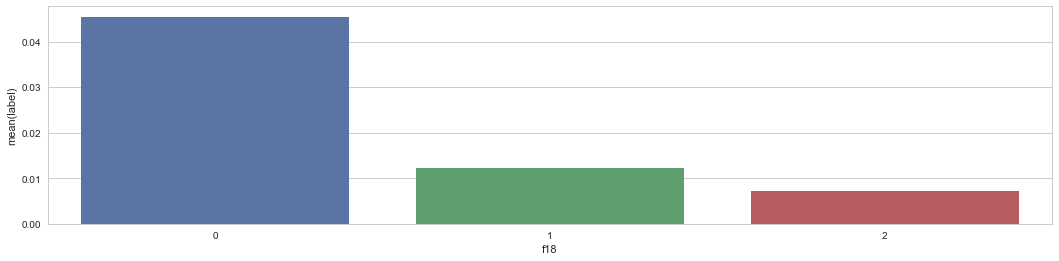

In [131]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f18')

1    495291
0    292580
2    202135
Name: f19, dtype: int64


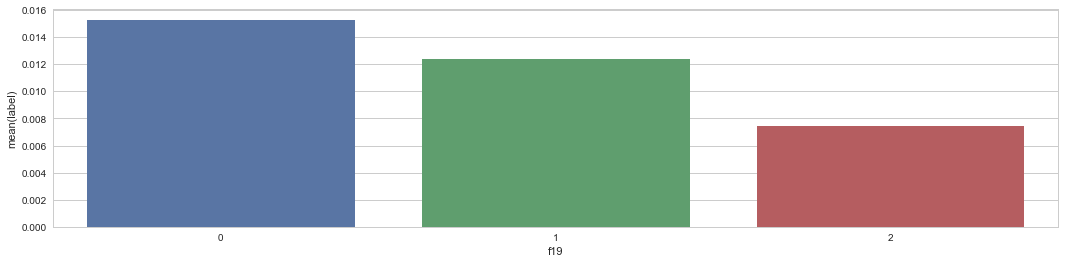

In [132]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f19')

1.0     188392
0.0     184523
31.0    109718
32.0     95713
30.0     18097
2.0       9151
17.0      7463
25.0      7265
24.0      7207
7.0       7200
5.0       7117
12.0      7072
22.0      7069
16.0      7020
4.0       7006
13.0      6975
21.0      6814
3.0       6679
9.0       6617
14.0      6594
23.0      6578
20.0      6350
10.0      6349
27.0      6333
8.0       6267
15.0      6232
28.0      6213
11.0      6113
6.0       6051
19.0      6046
18.0      6046
29.0      5966
26.0      5872
Name: f20, dtype: int64


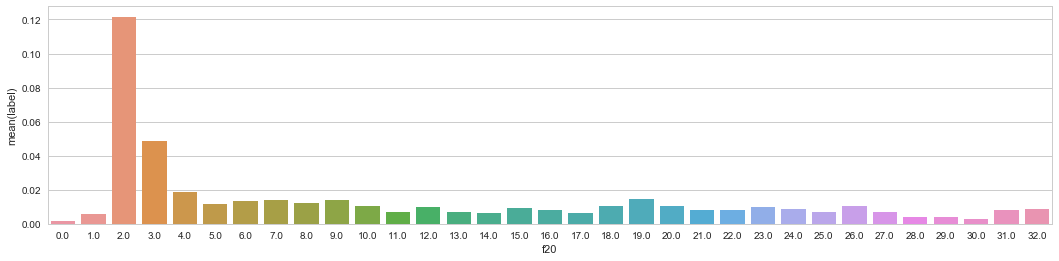

In [133]:
plotNegativeSamplesPercent_By_UniqueInstances(date_df,'f20')

In [140]:
list = []
for col in date_df.columns:
    if len(date_df[col].unique())<=40:
        print ("Column {} has {} unique instances".format( col, len(date_df[col].unique())) )
        list.append(col)
    else:
        pass

Column label has 2 unique instances
Column f1 has 3 unique instances
Column f2 has 3 unique instances
Column f3 has 3 unique instances
Column f4 has 3 unique instances
Column f6 has 5 unique instances
Column f7 has 8 unique instances
Column f8 has 3 unique instances
Column f9 has 3 unique instances
Column f10 has 3 unique instances
Column f11 has 3 unique instances
Column f12 has 3 unique instances
Column f13 has 3 unique instances
Column f14 has 3 unique instances
Column f15 has 3 unique instances
Column f16 has 3 unique instances
Column f17 has 3 unique instances
Column f18 has 3 unique instances
Column f19 has 3 unique instances
Column f20 has 34 unique instances
Column f24 has 34 unique instances
Column f28 has 15 unique instances
Column f29 has 15 unique instances
Column f30 has 27 unique instances
Column f31 has 31 unique instances
Column f32 has 33 unique instances
Column f36 has 4 unique instances
Column f37 has 4 unique instances
Column f38 has 10 unique instances
Column f39 h

D:\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


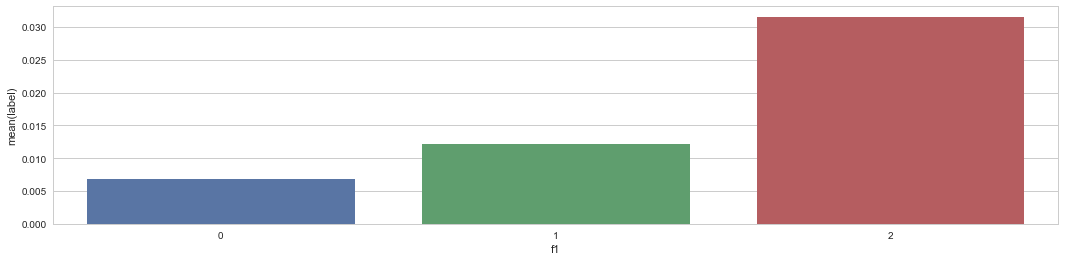

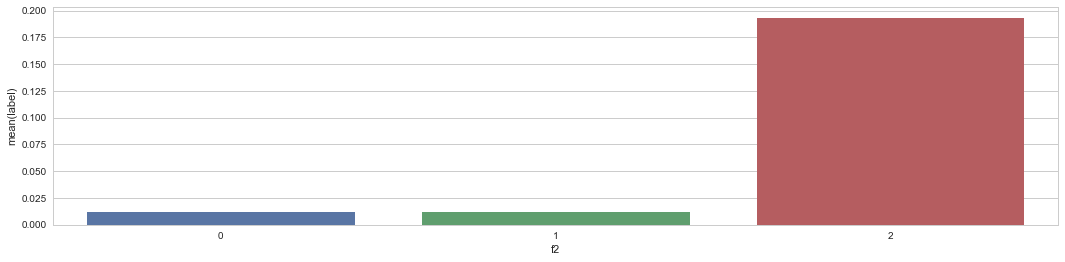

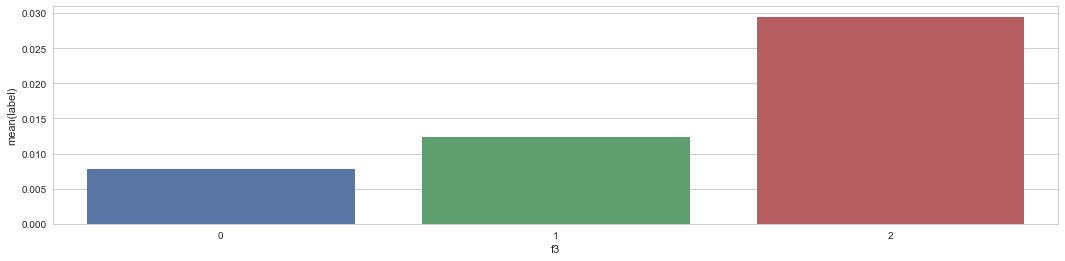

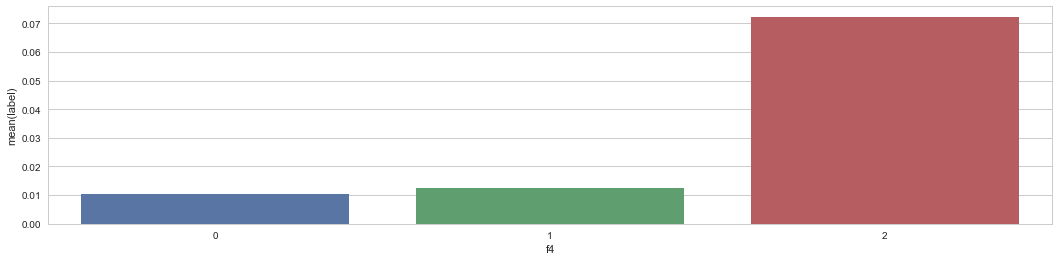

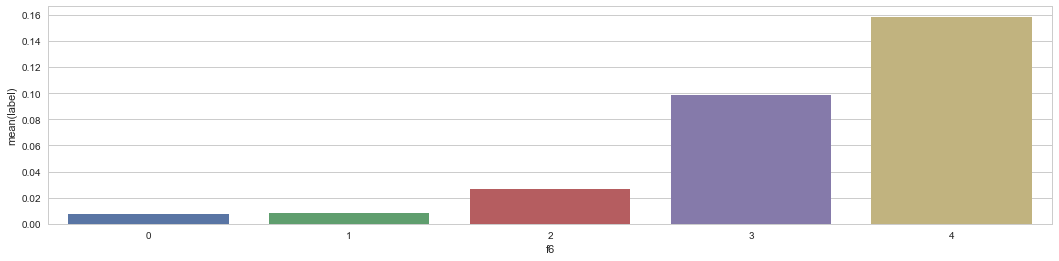

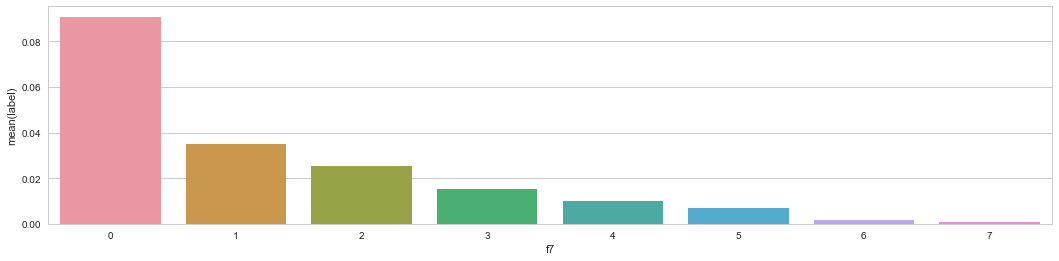

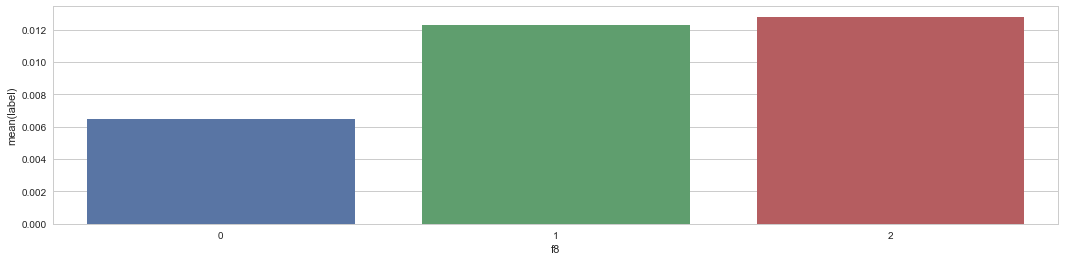

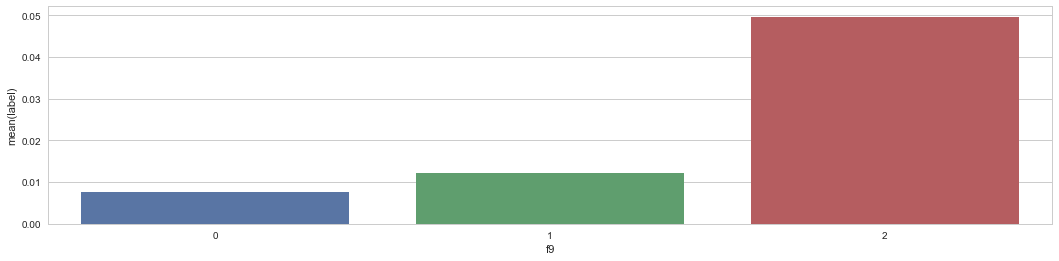

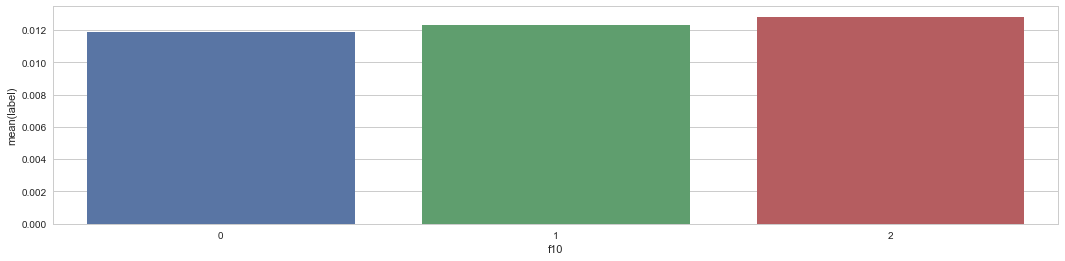

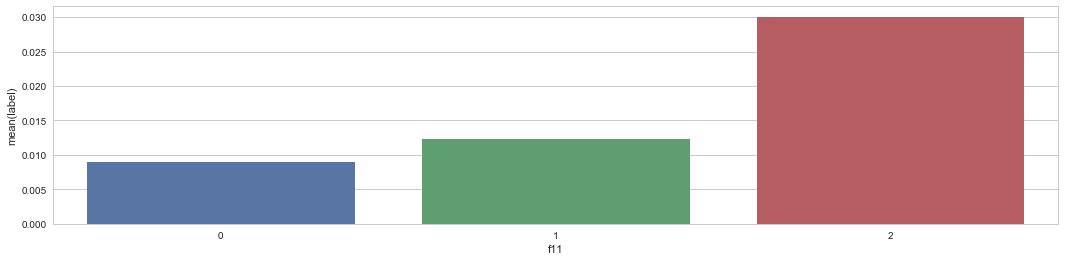

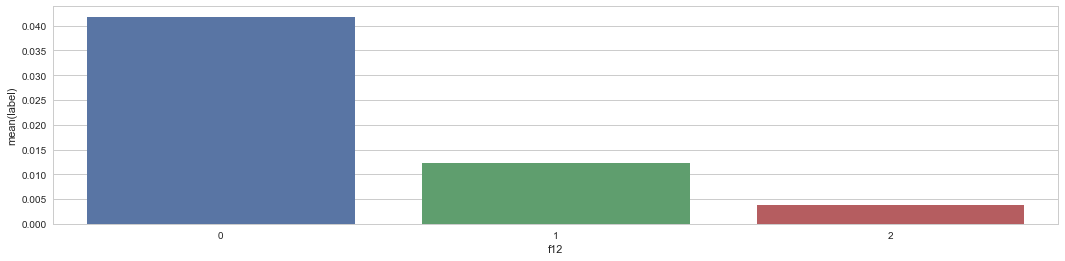

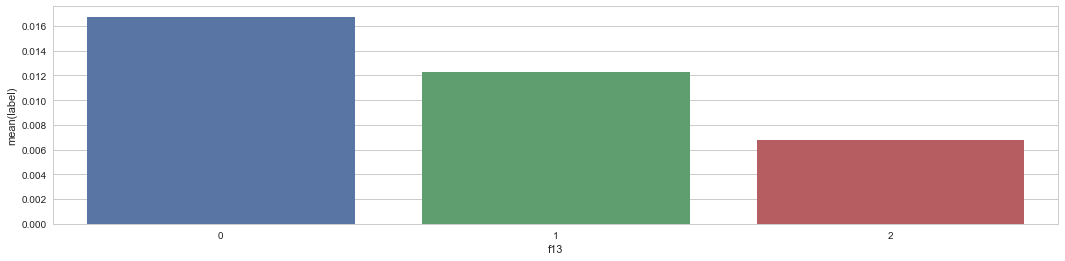

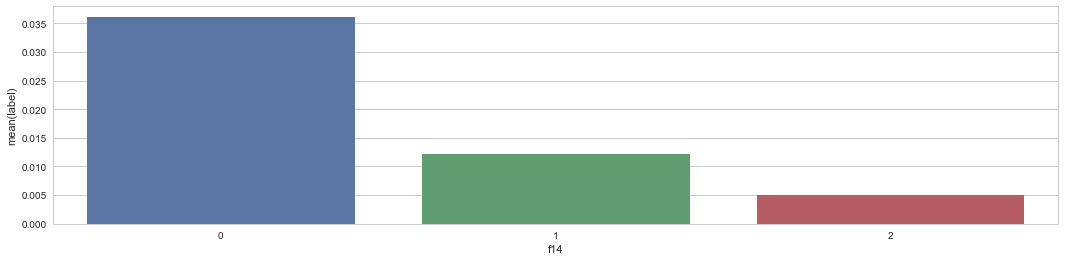

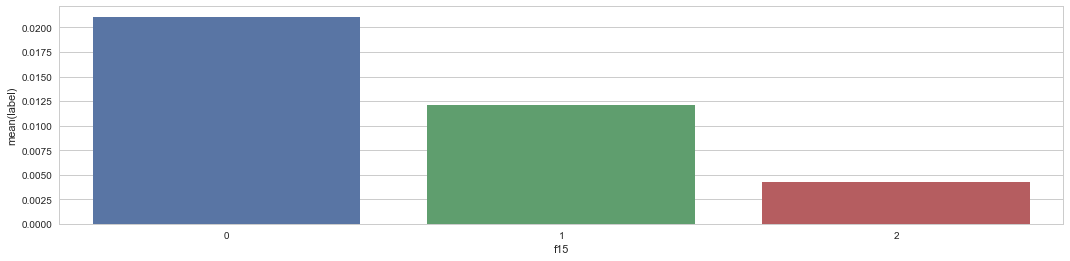

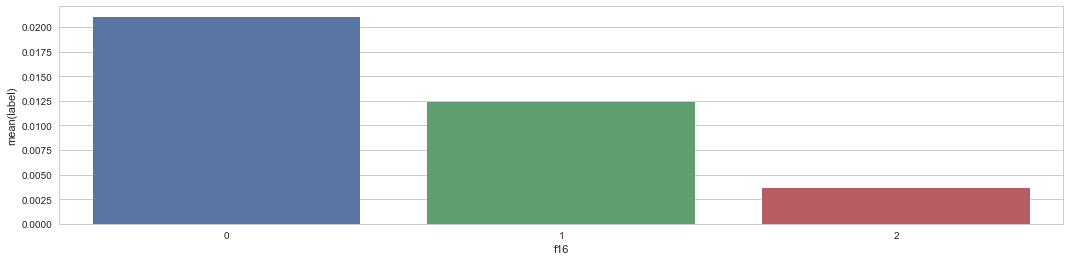

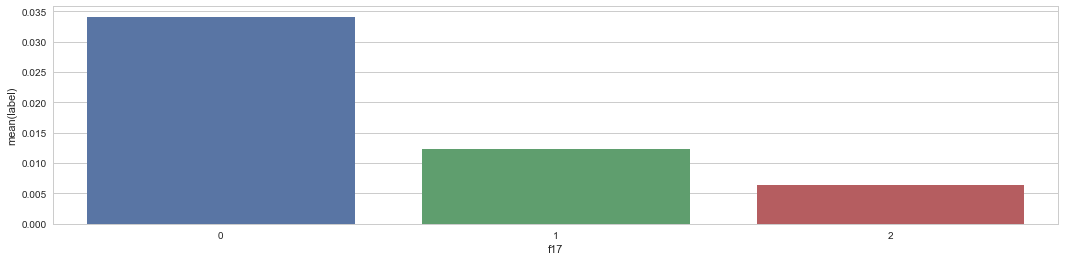

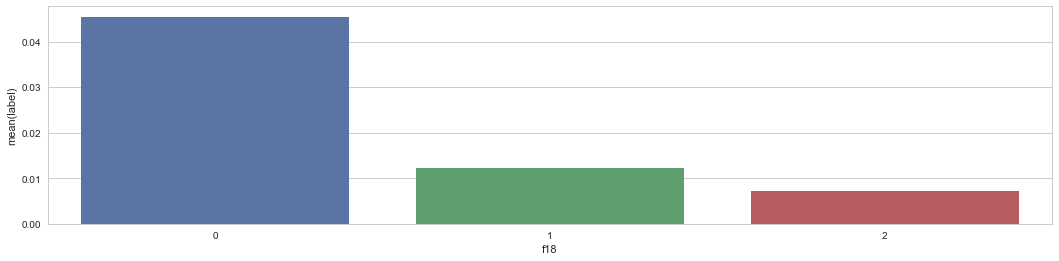

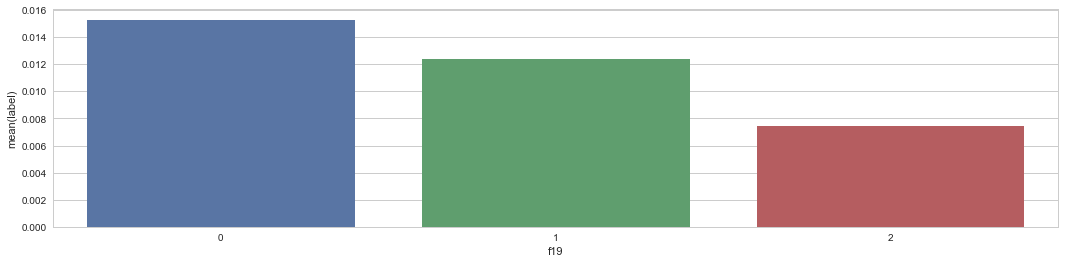

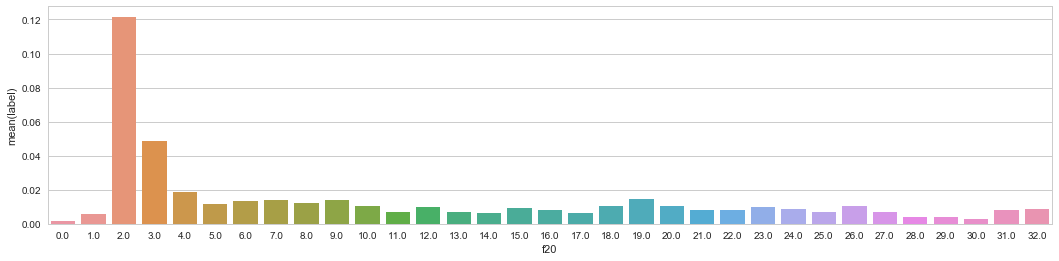

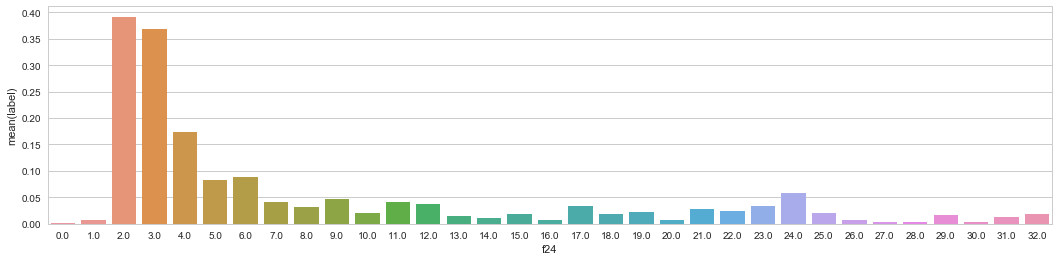

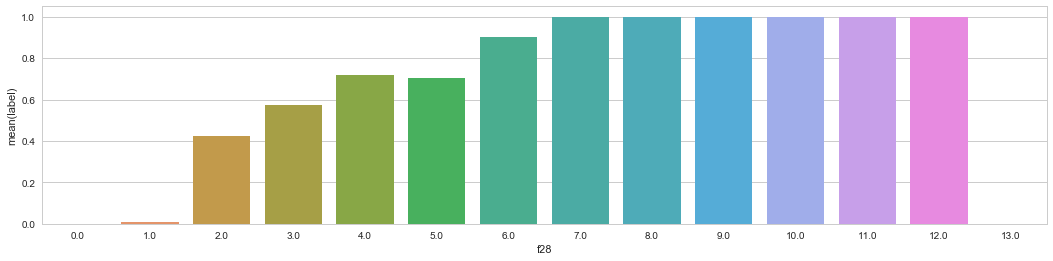

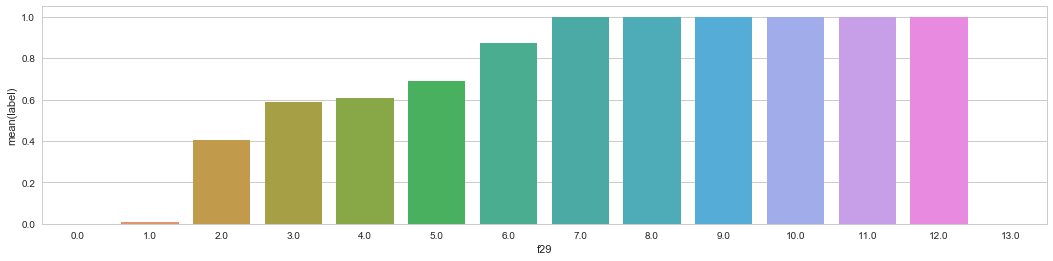

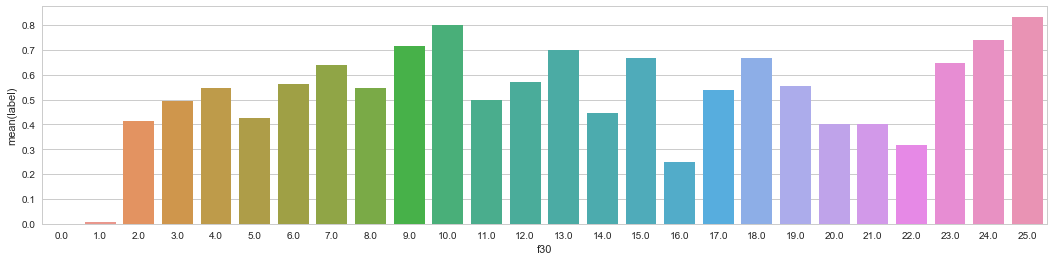

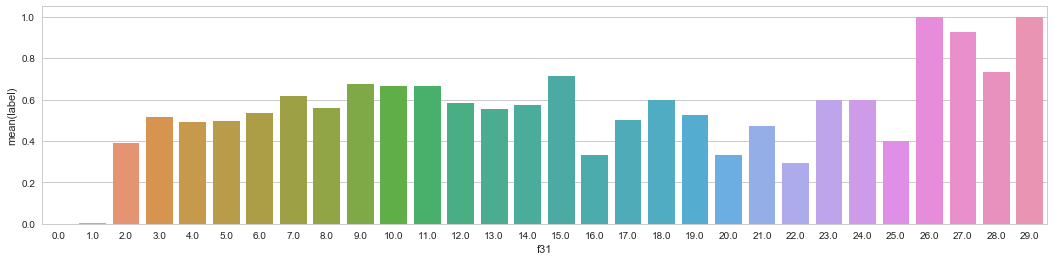

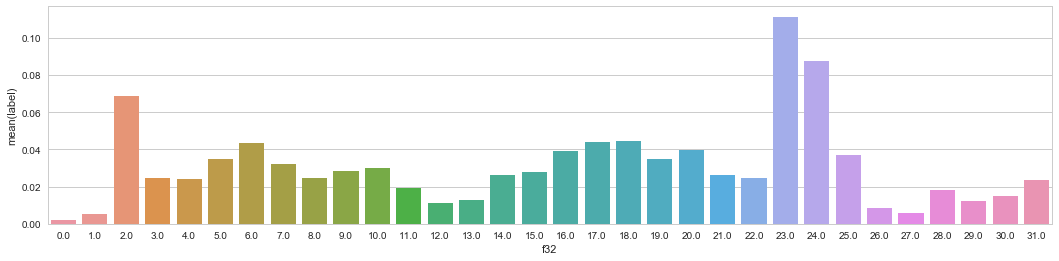

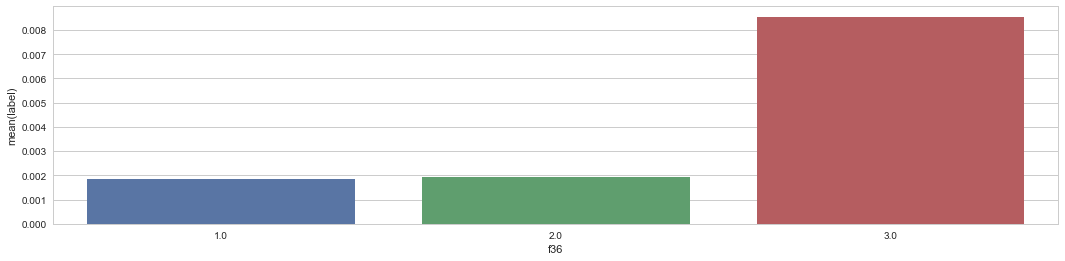

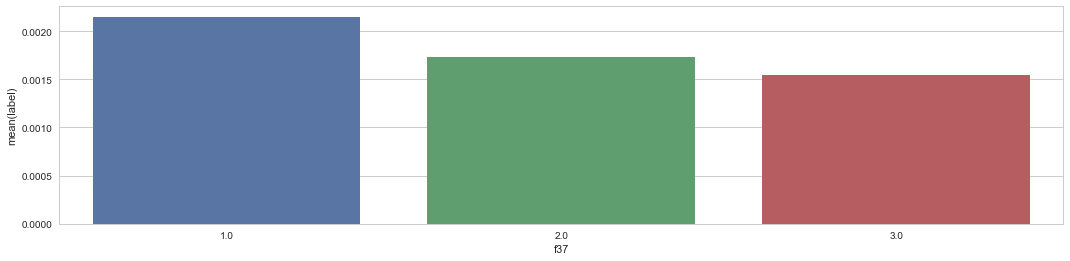

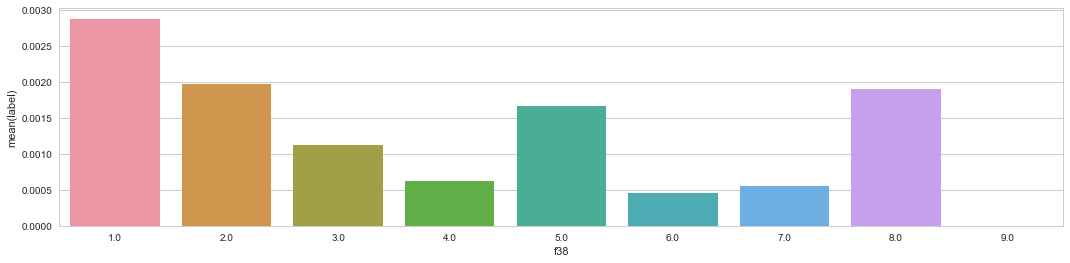

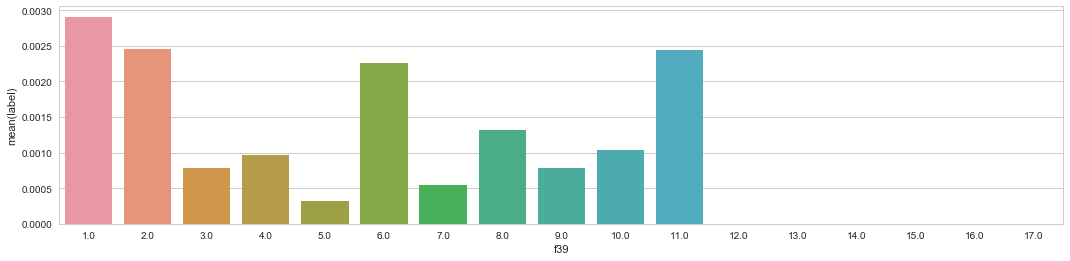

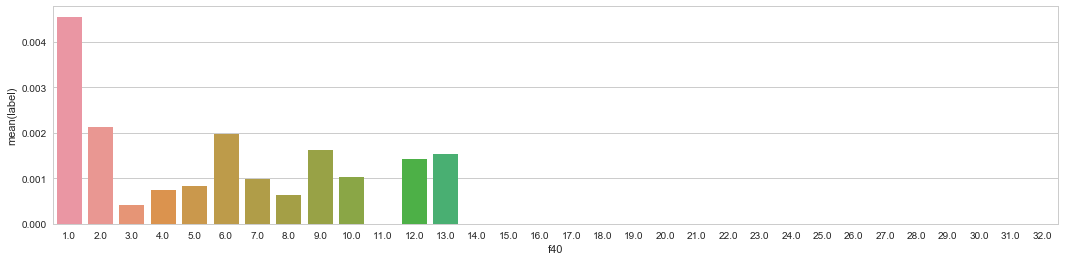

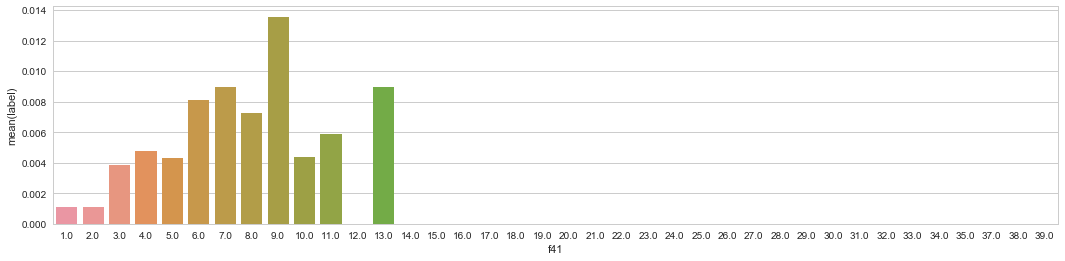

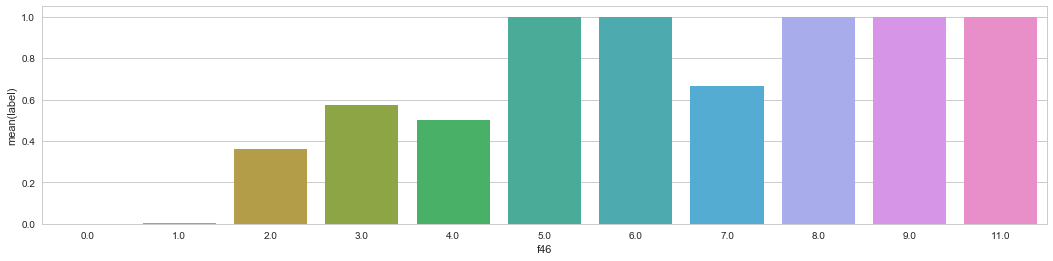

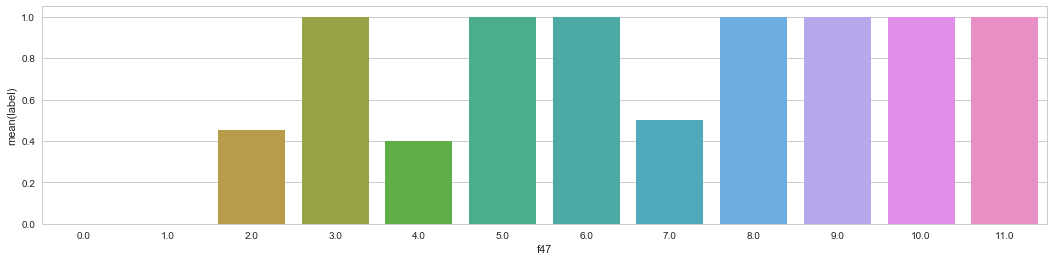

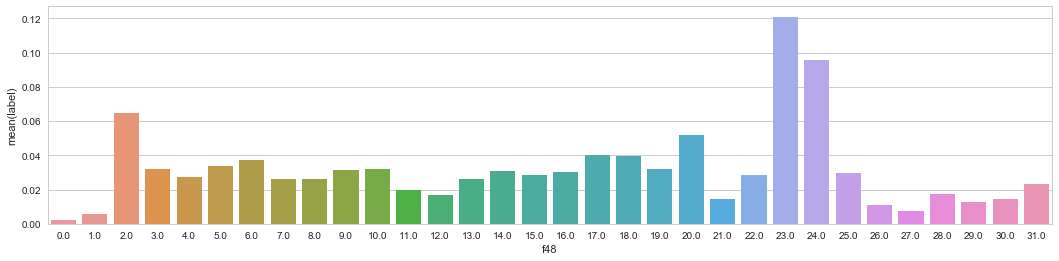

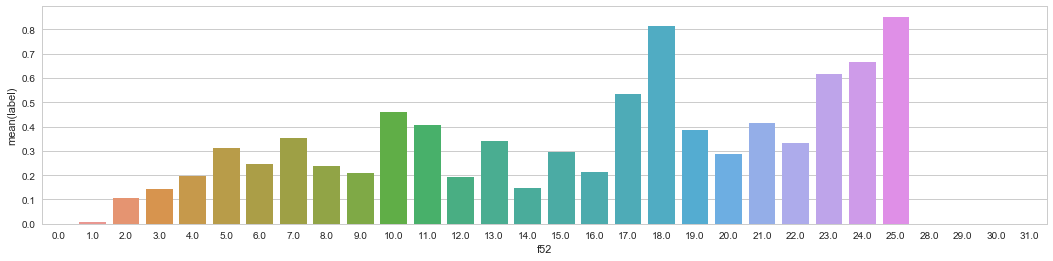

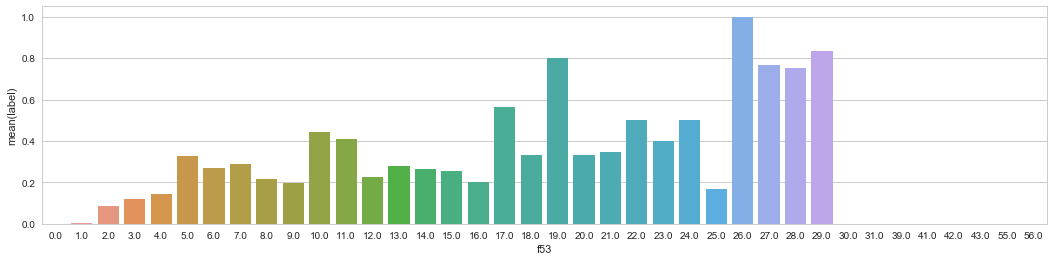

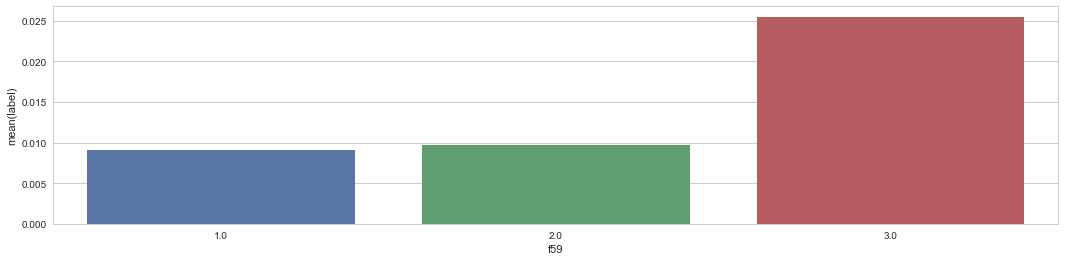

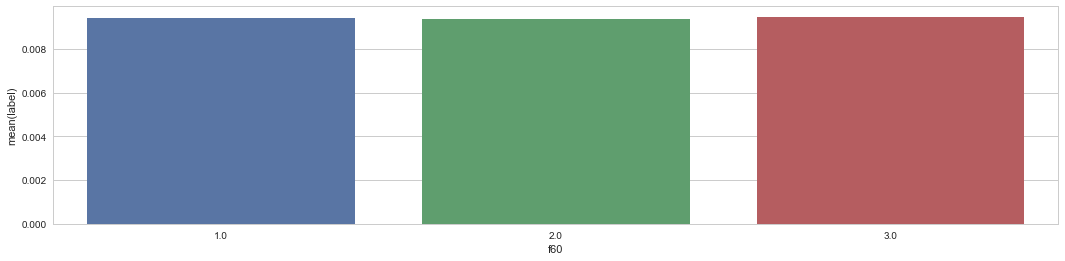

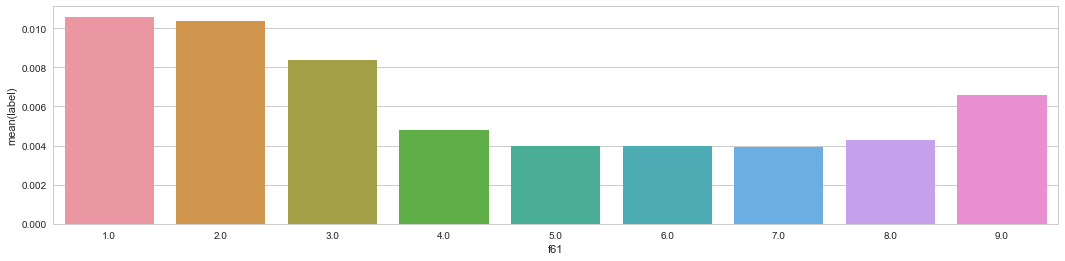

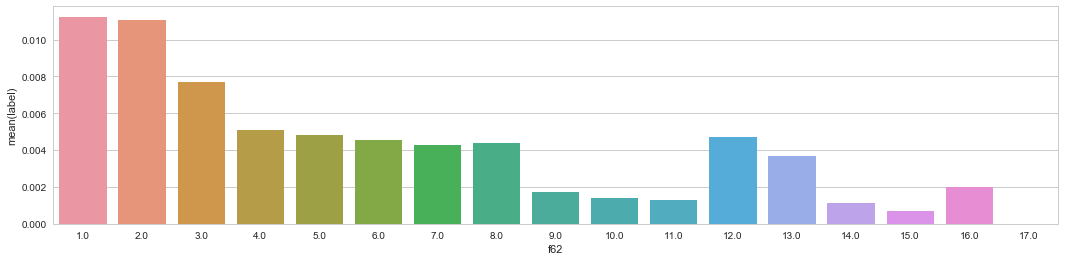

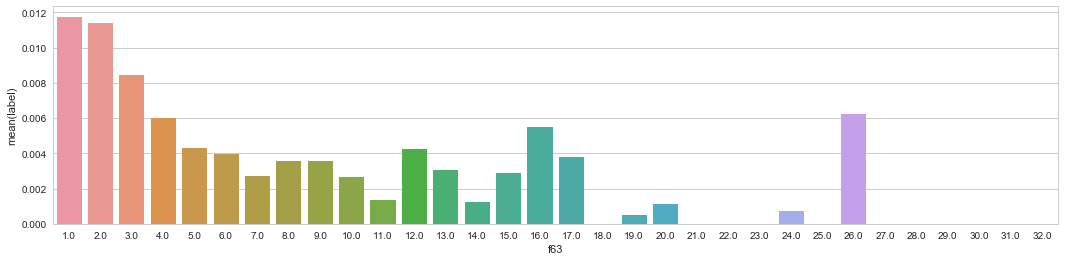

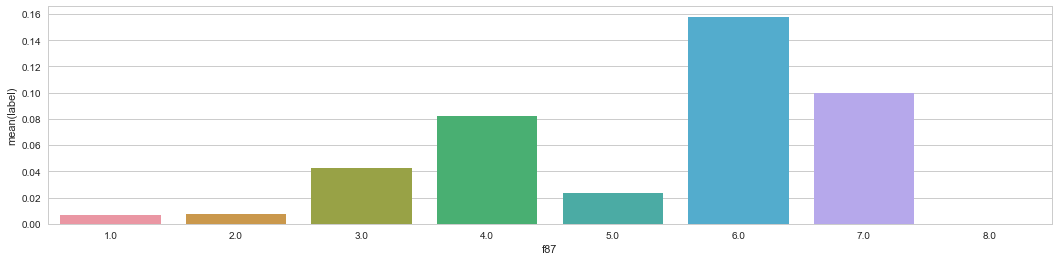

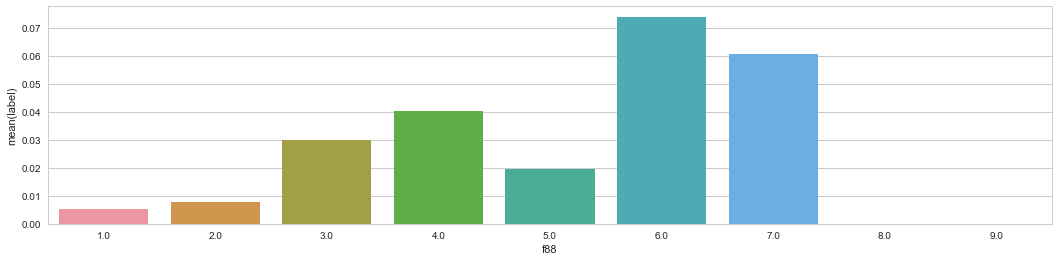

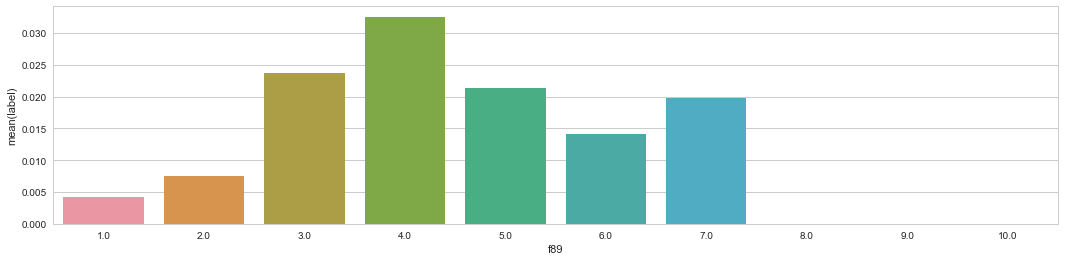

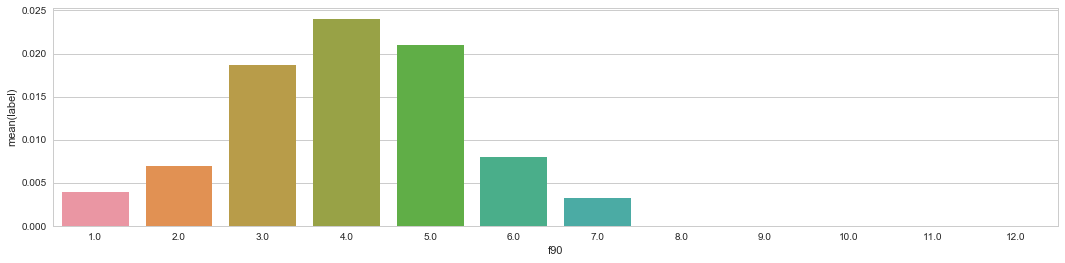

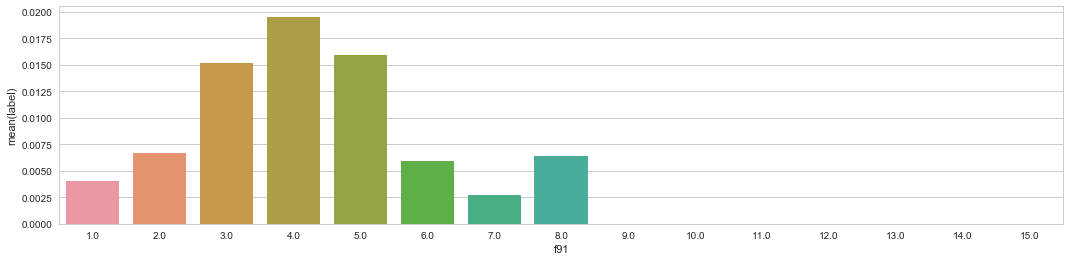

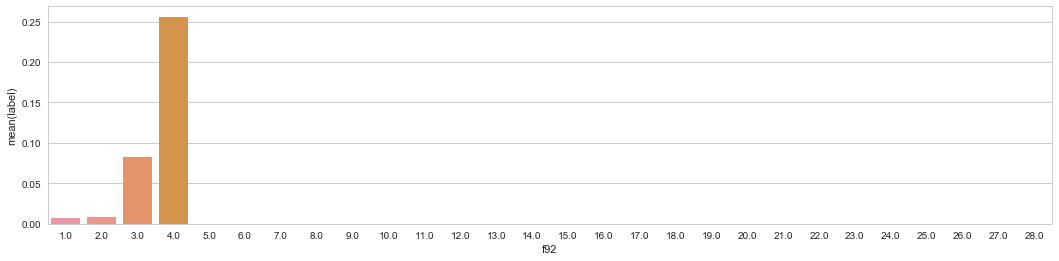

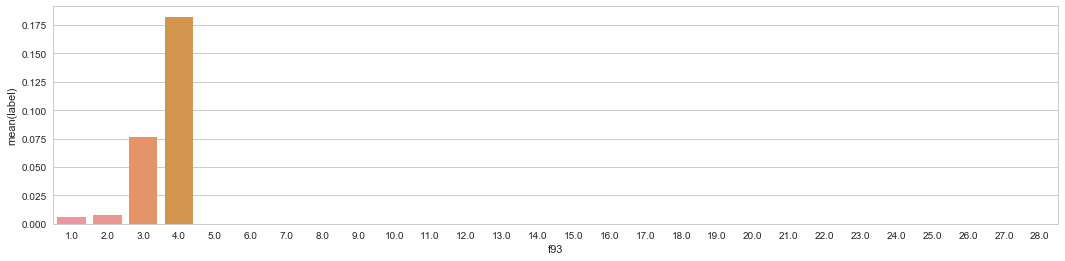

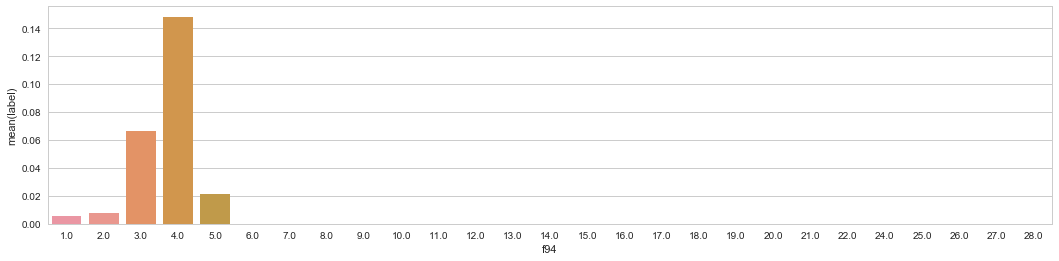

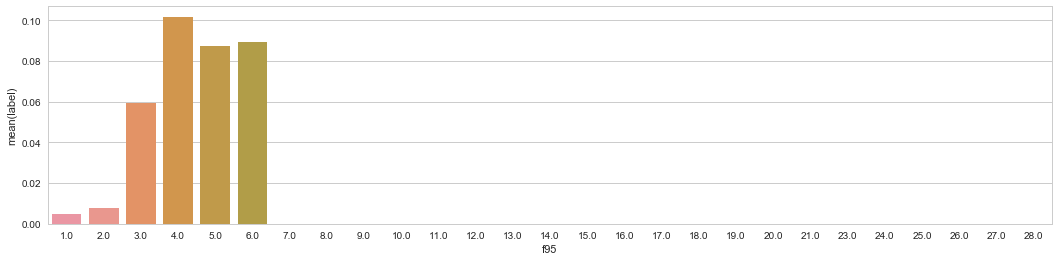

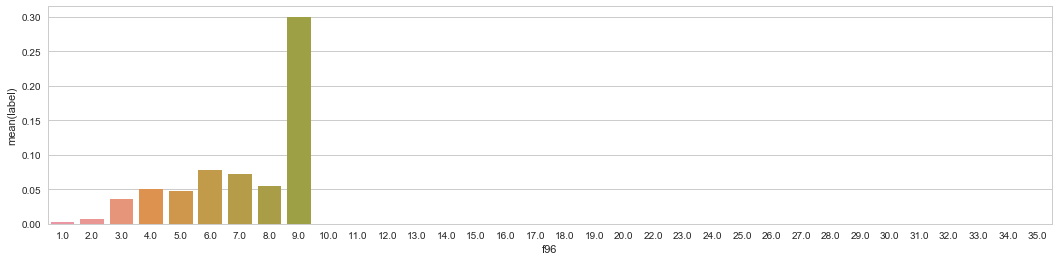

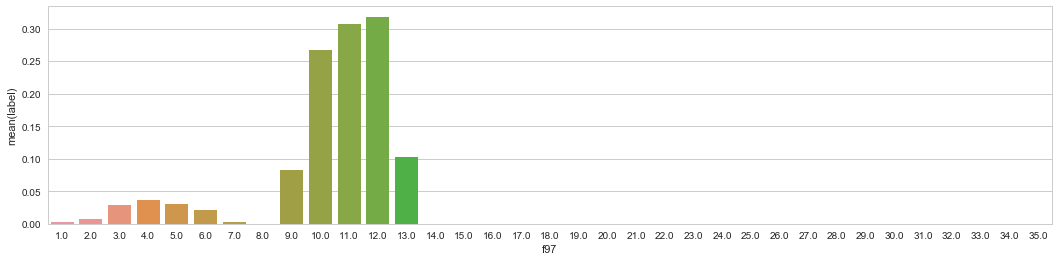

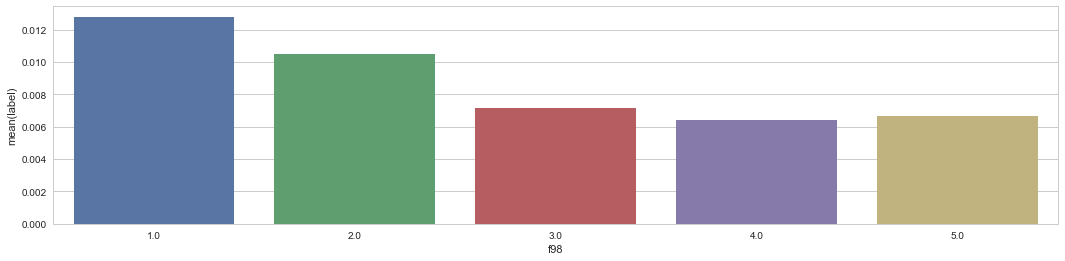

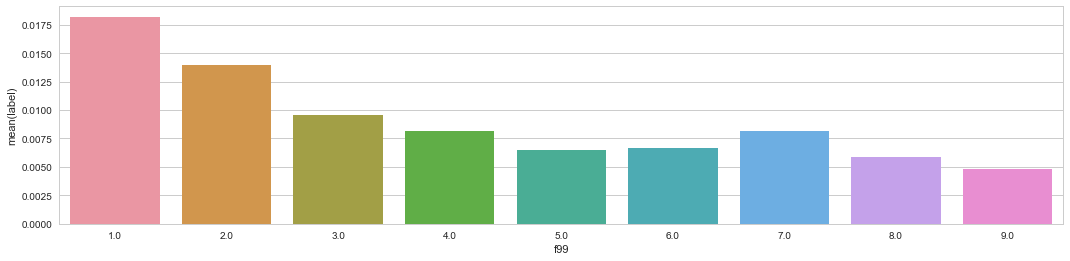

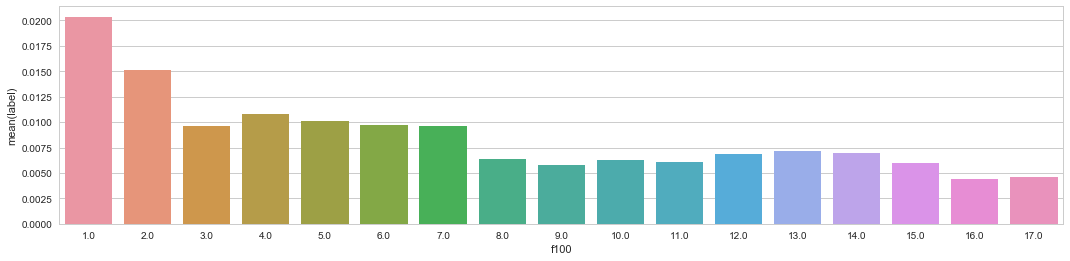

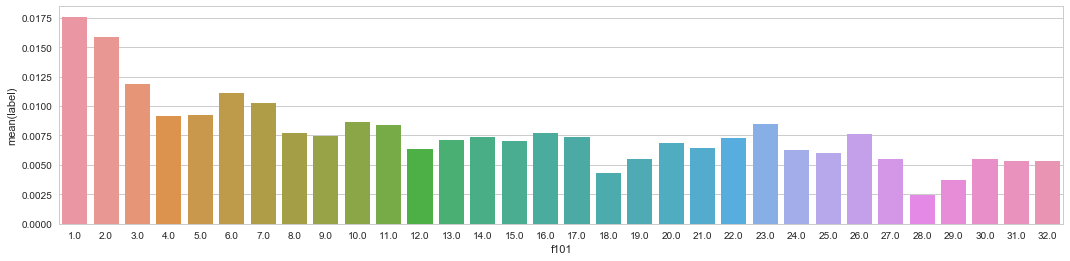

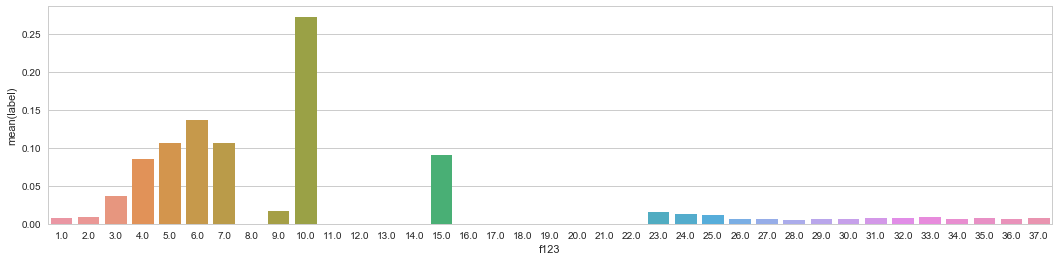

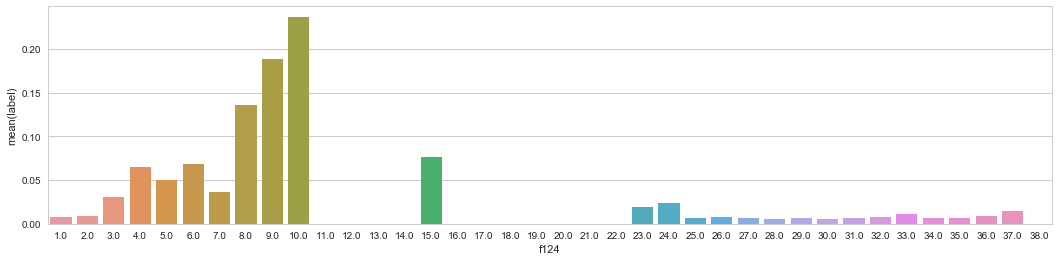

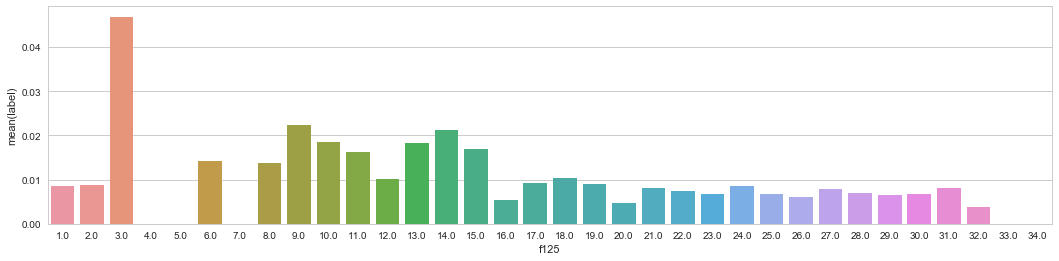

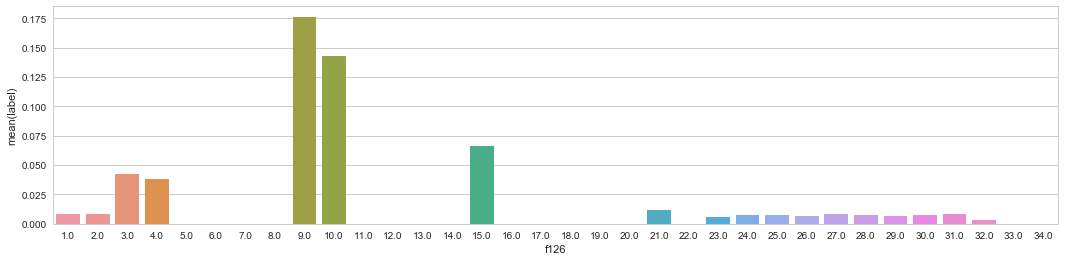

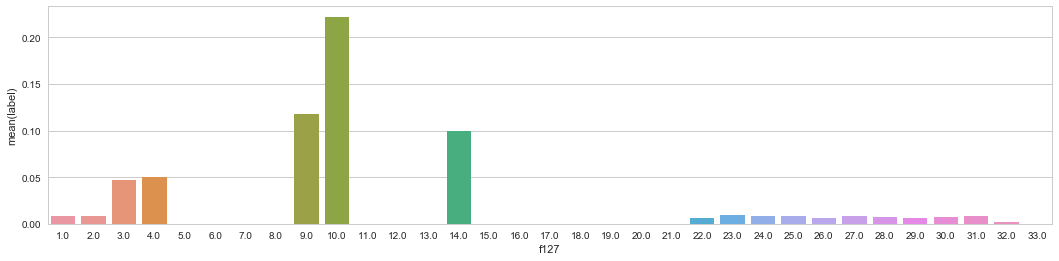

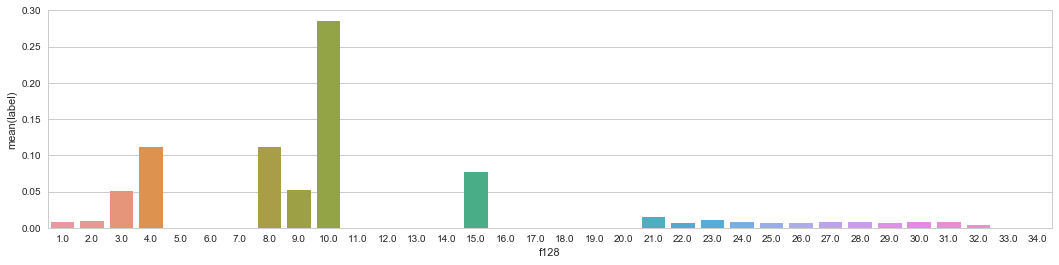

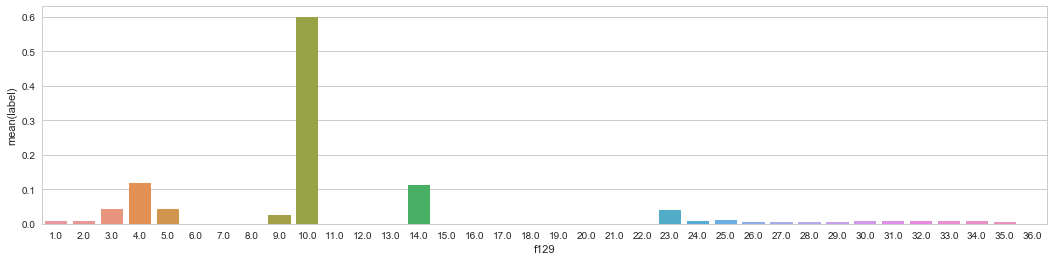

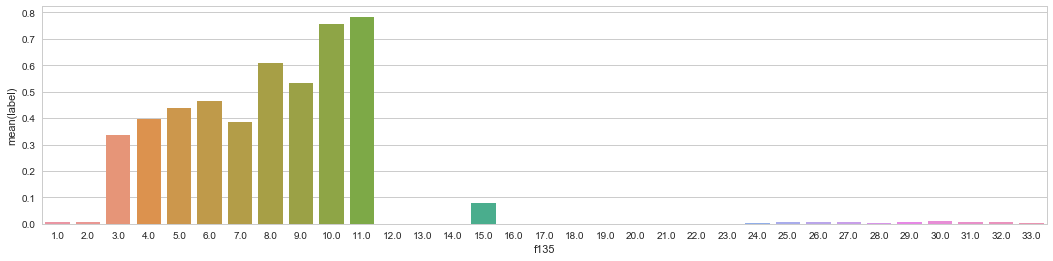

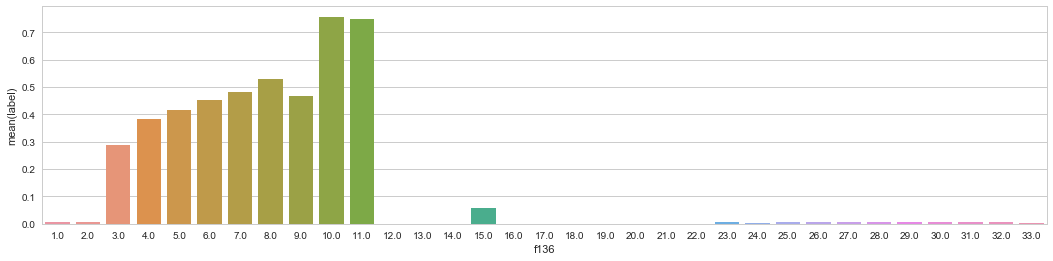

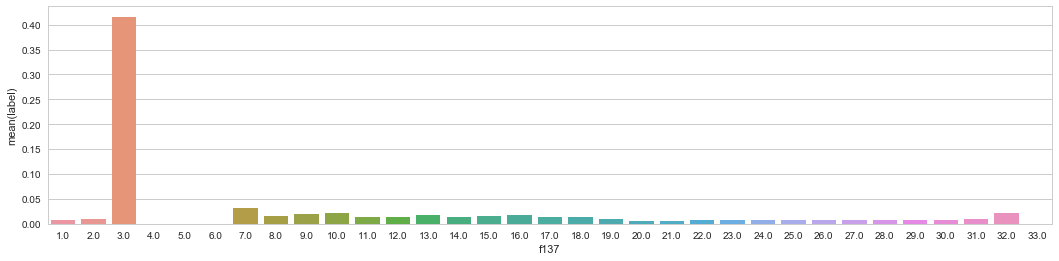

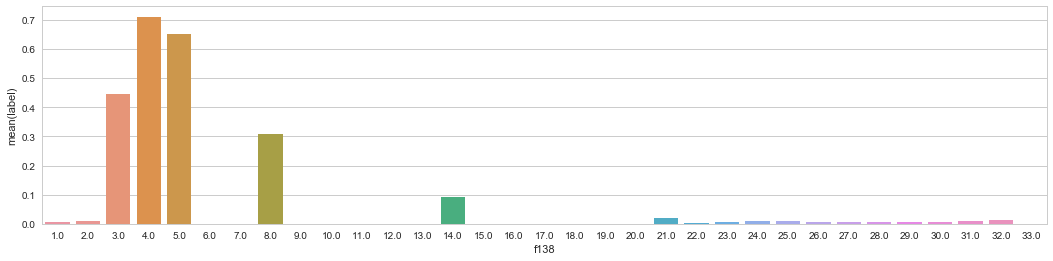

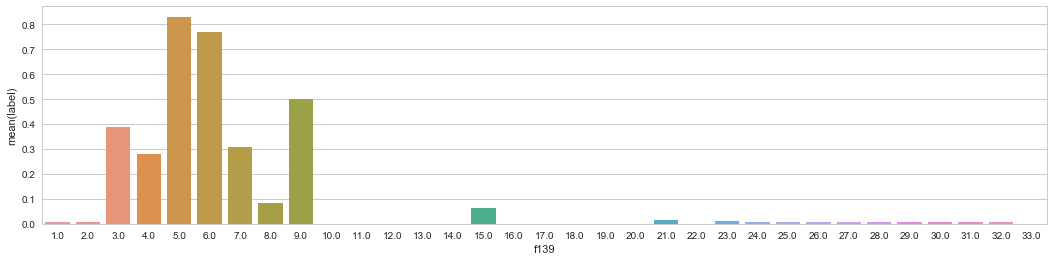

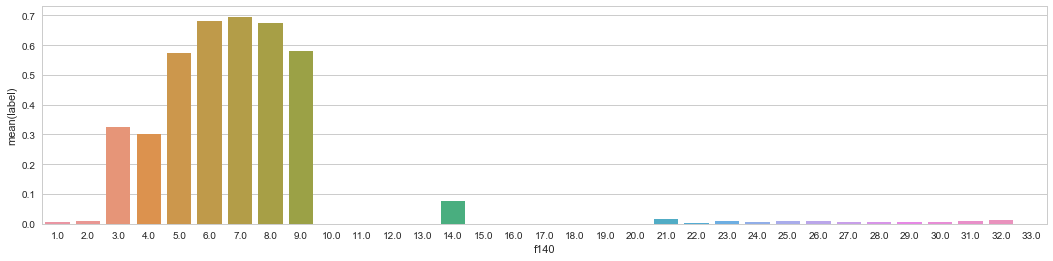

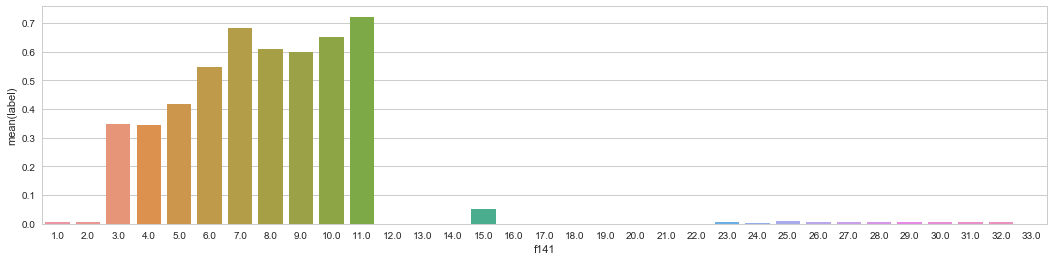

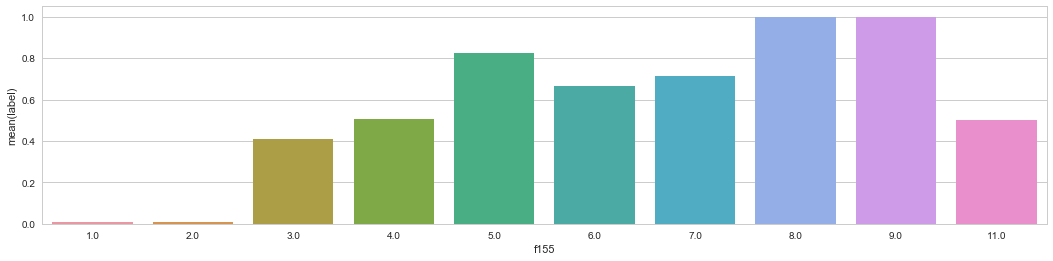

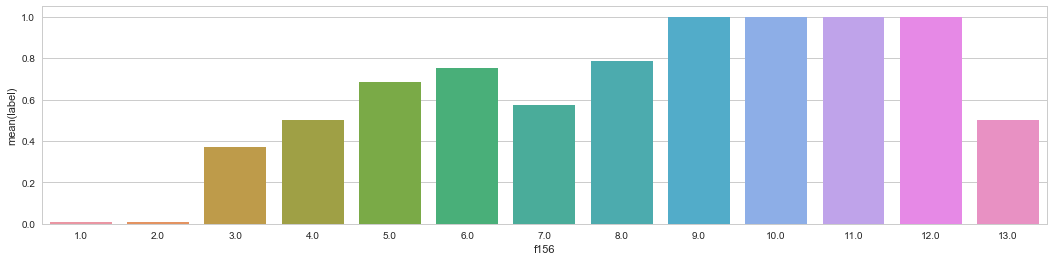

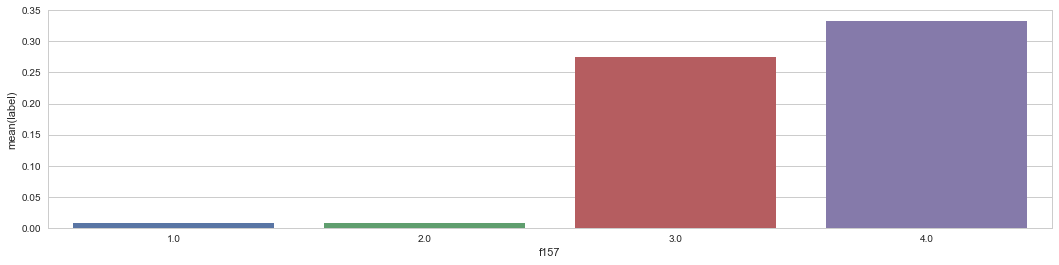

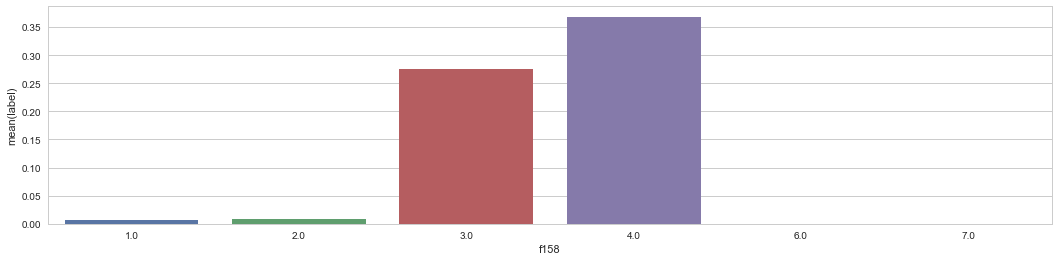

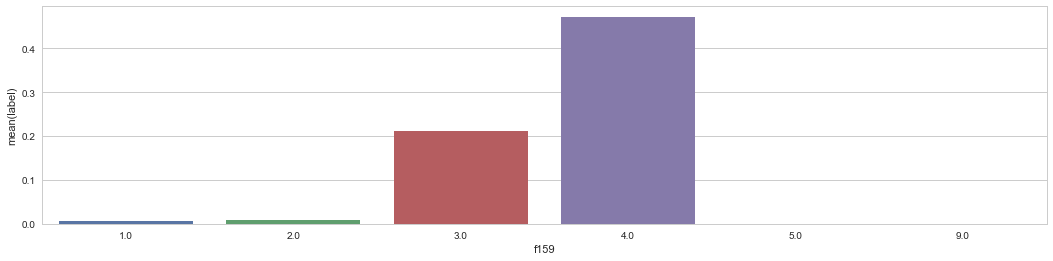

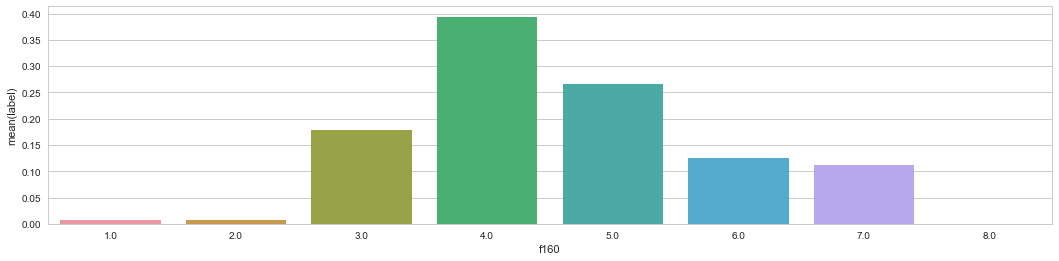

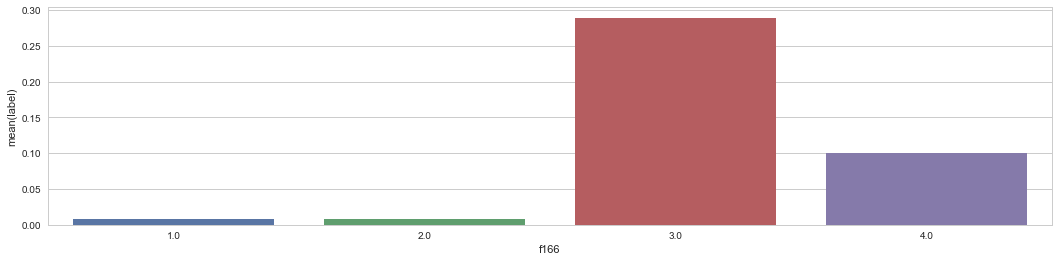

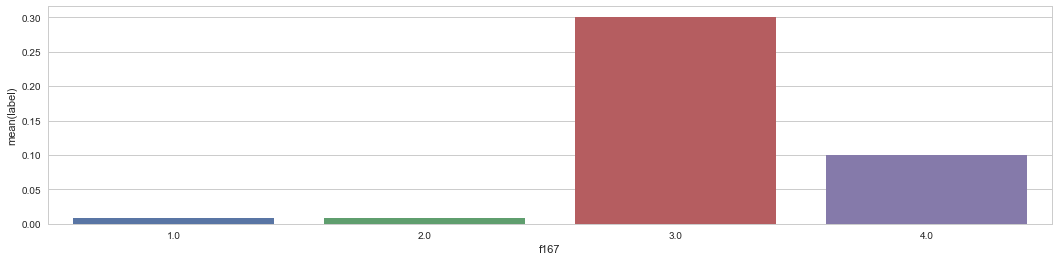

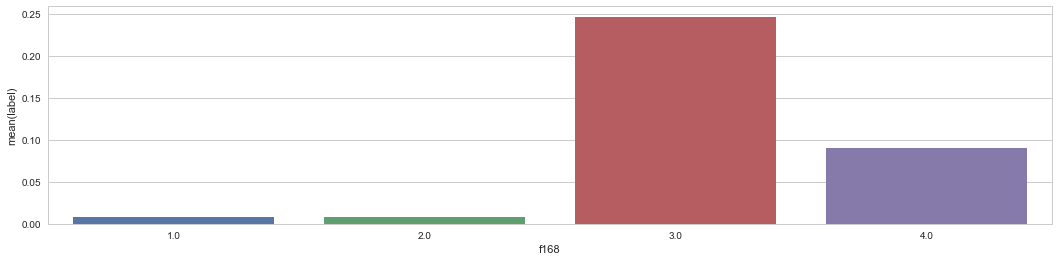

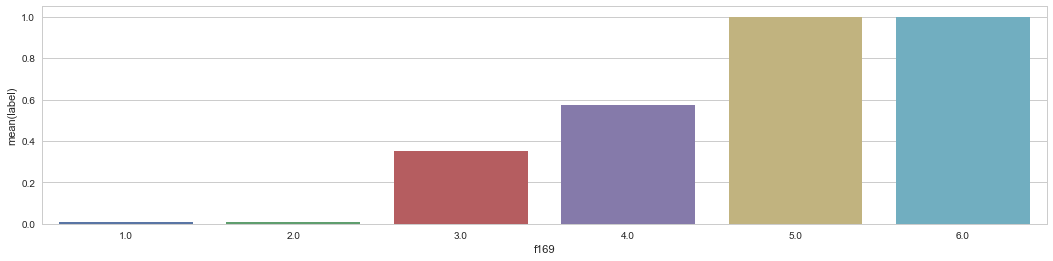

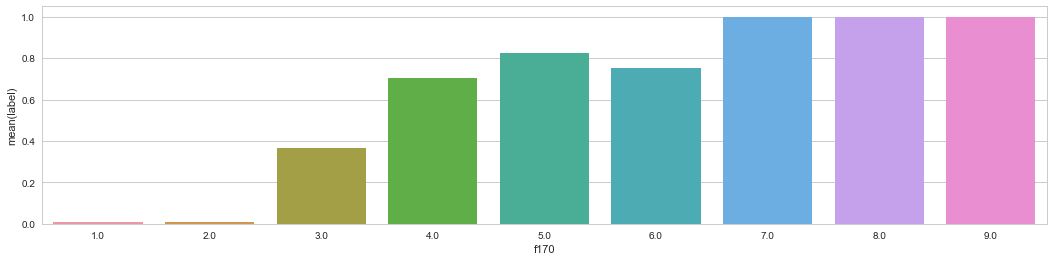

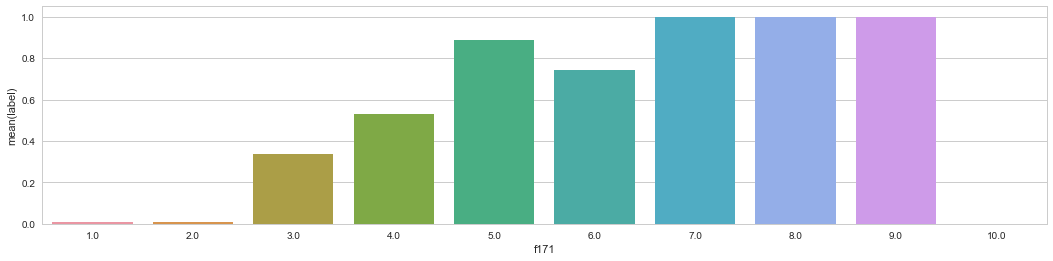

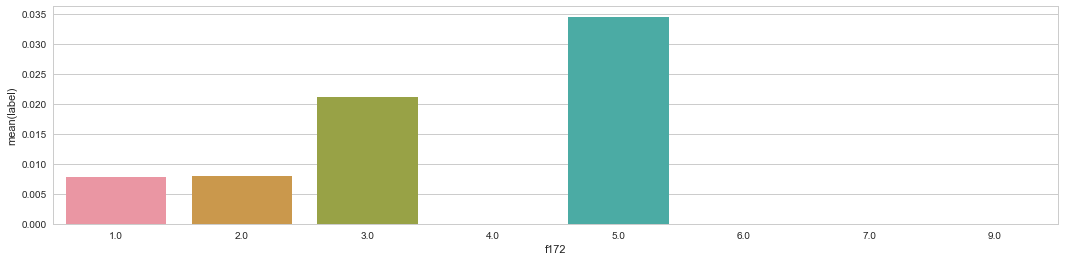

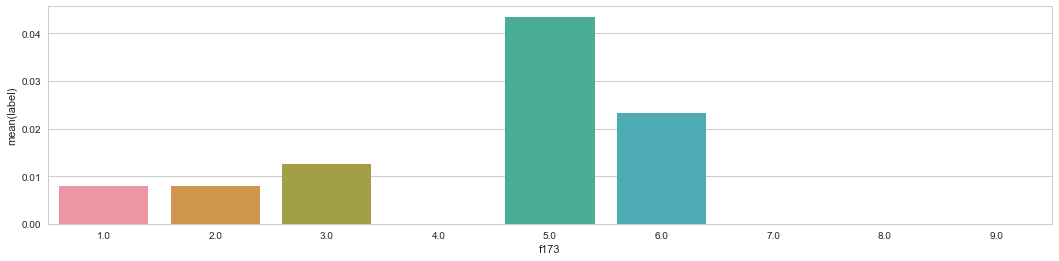

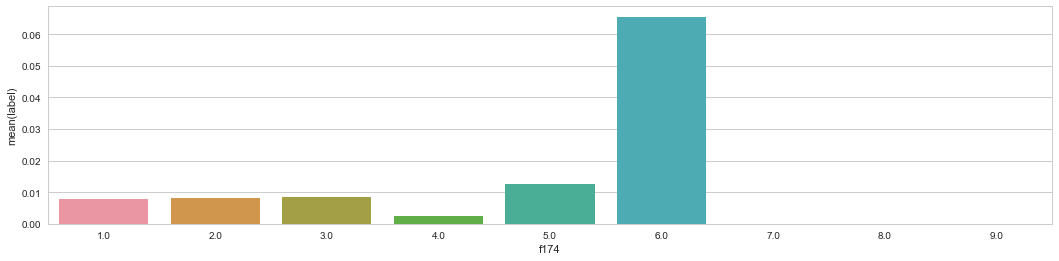

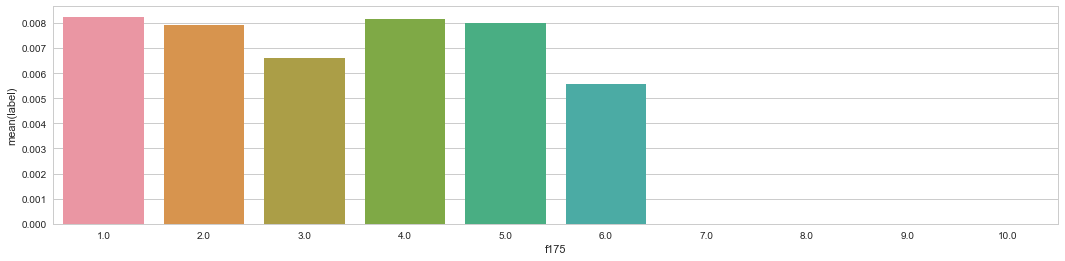

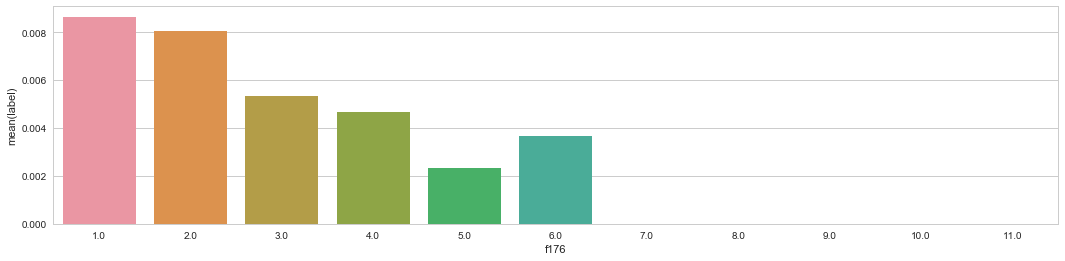

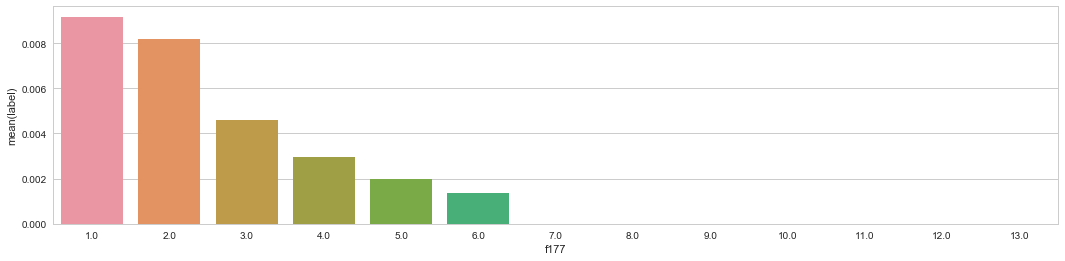

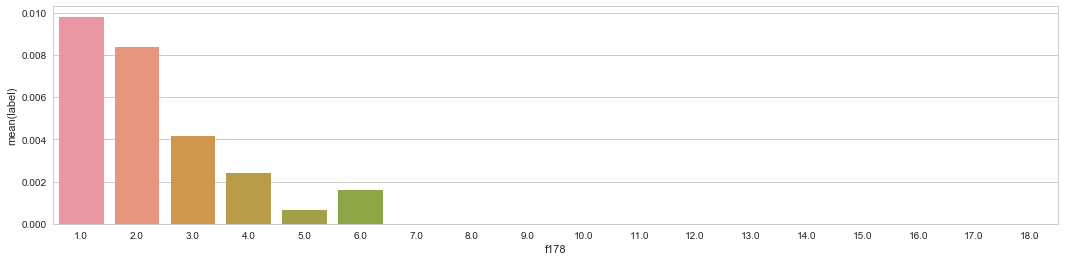

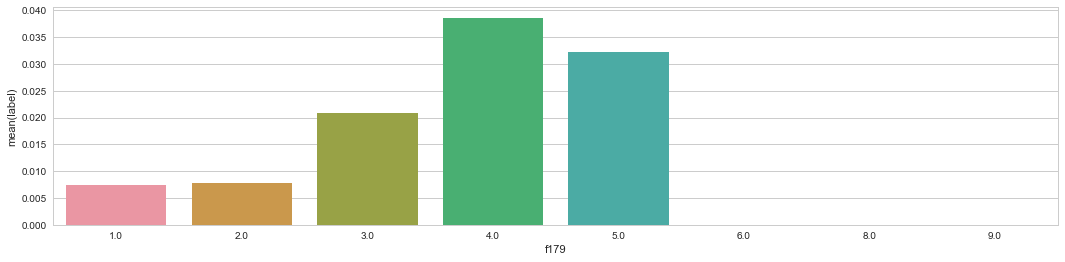

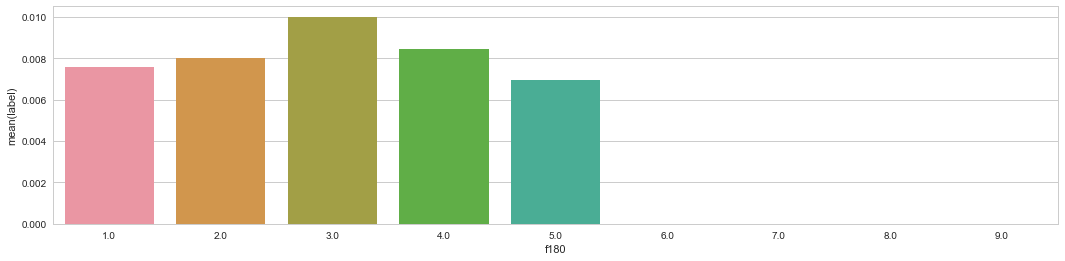

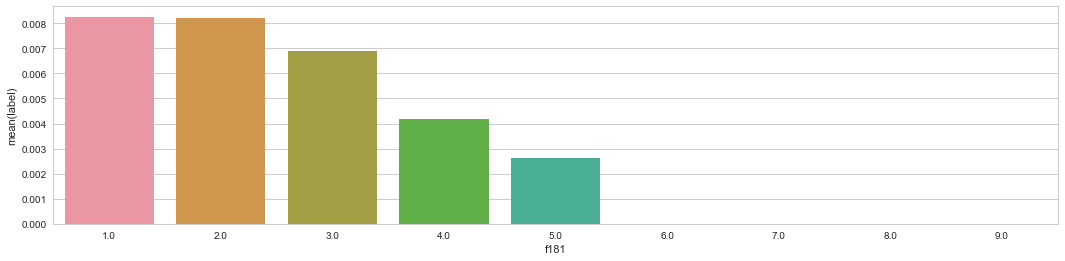

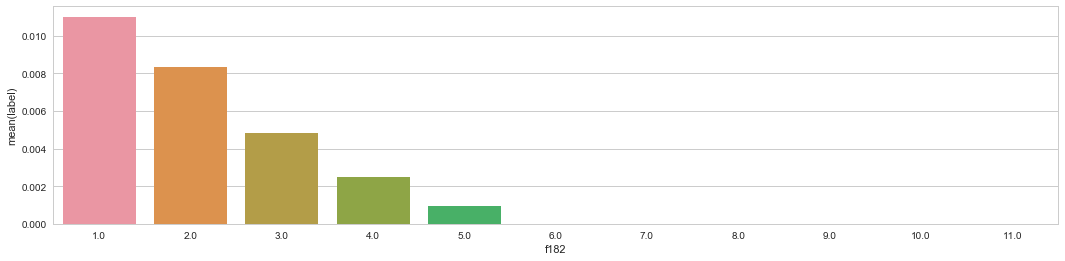

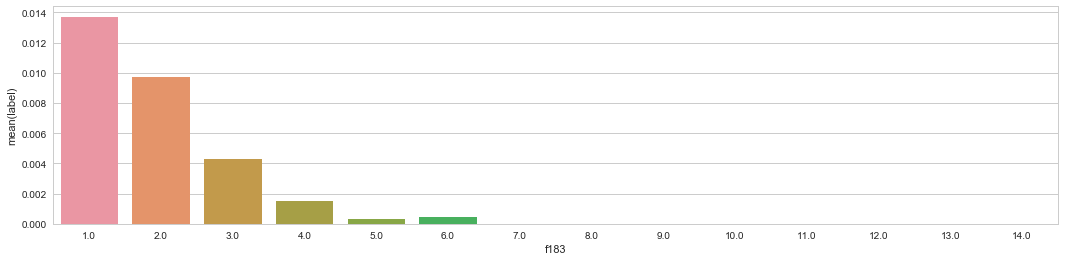

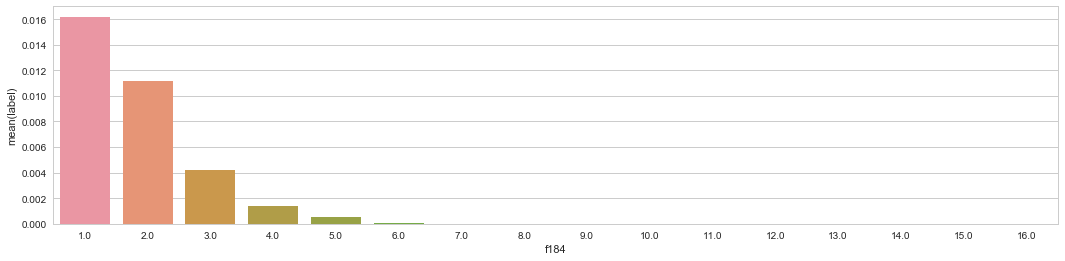

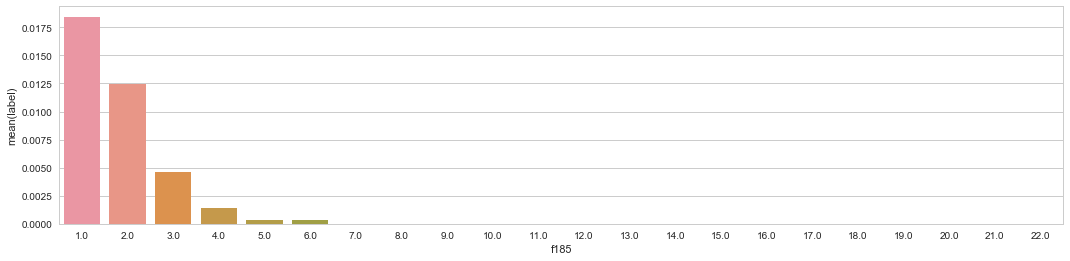

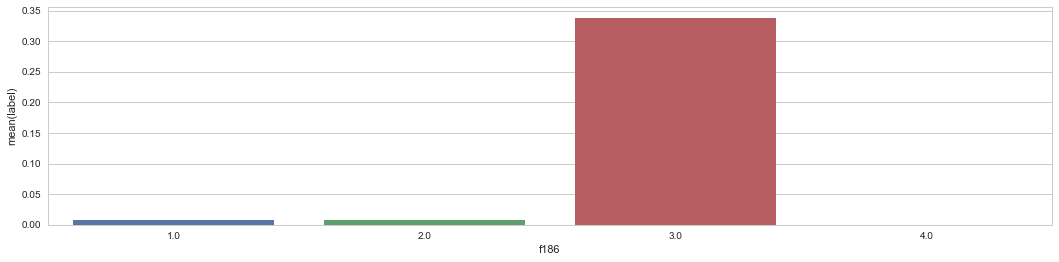

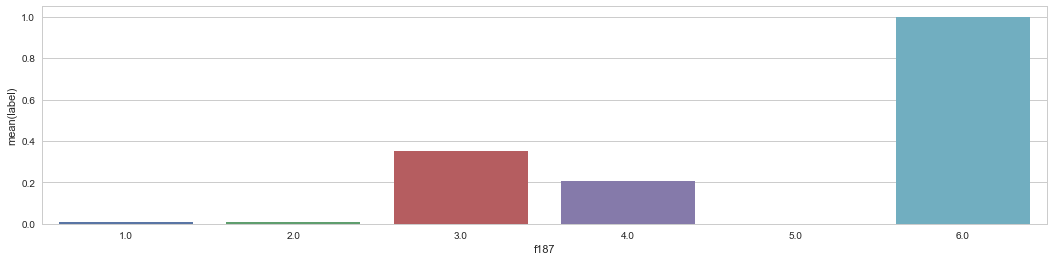

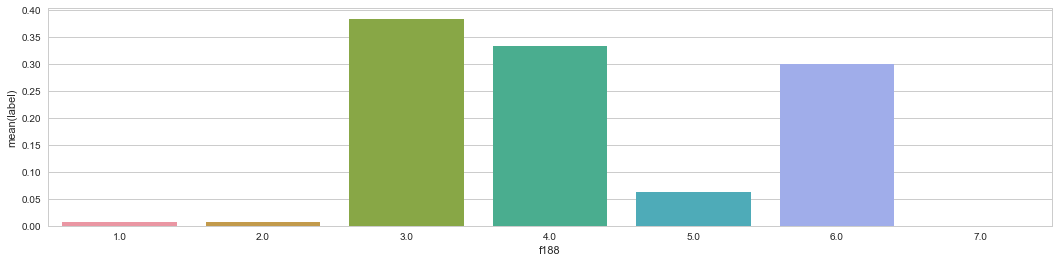

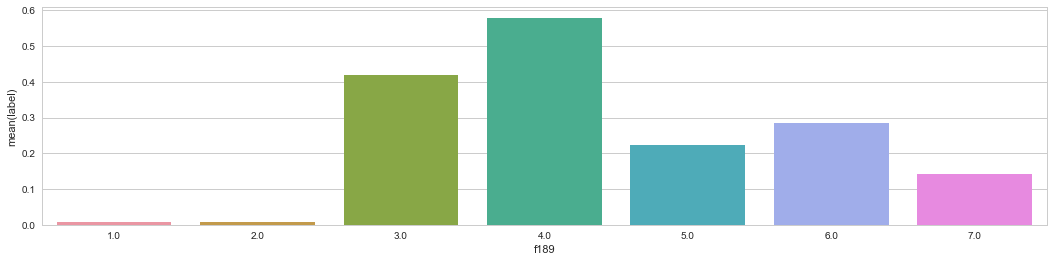

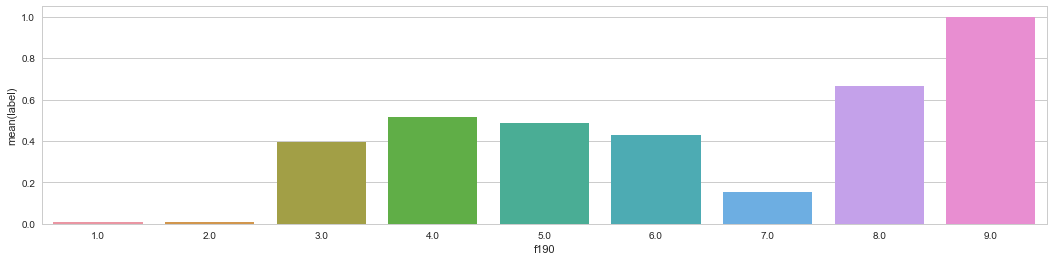

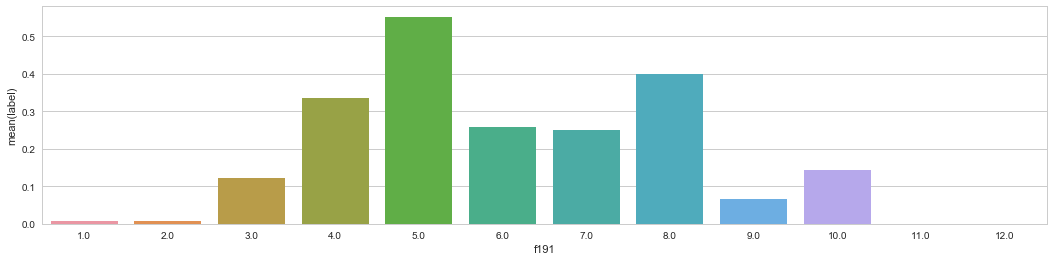

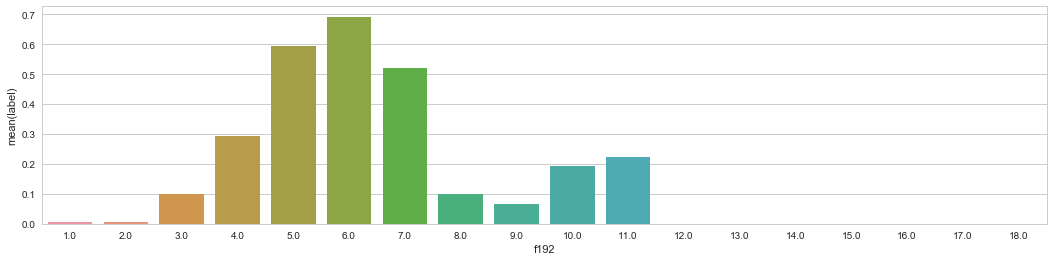

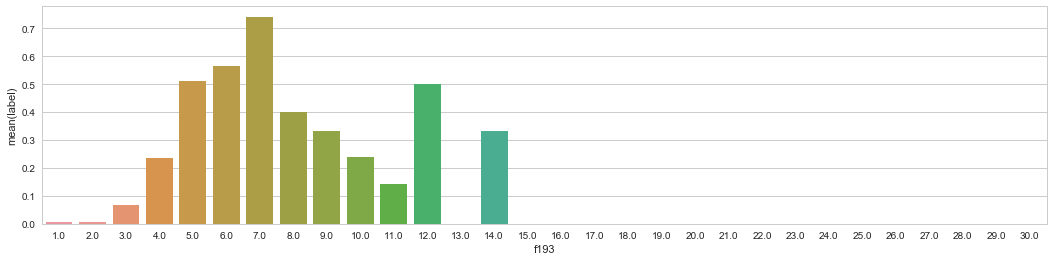

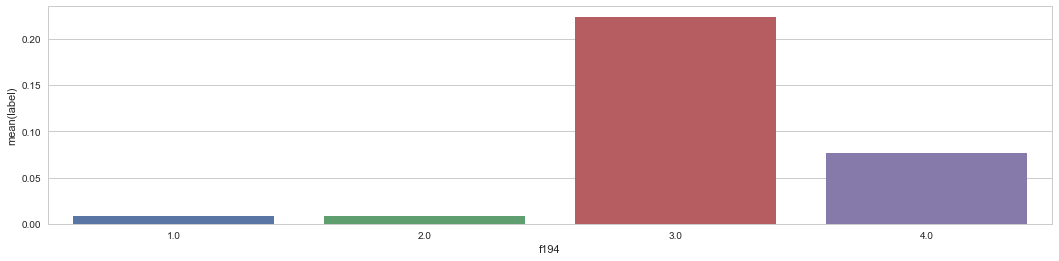

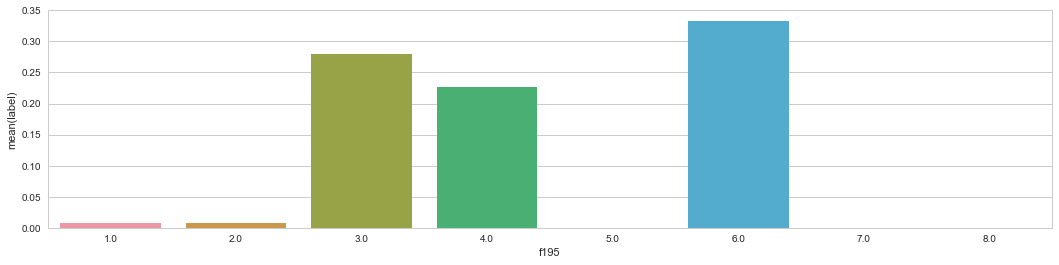

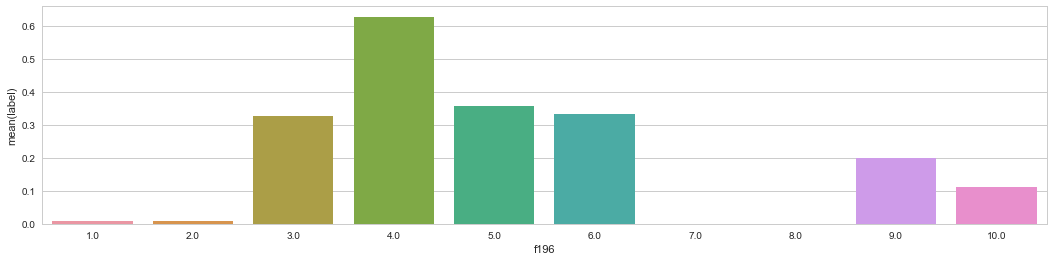

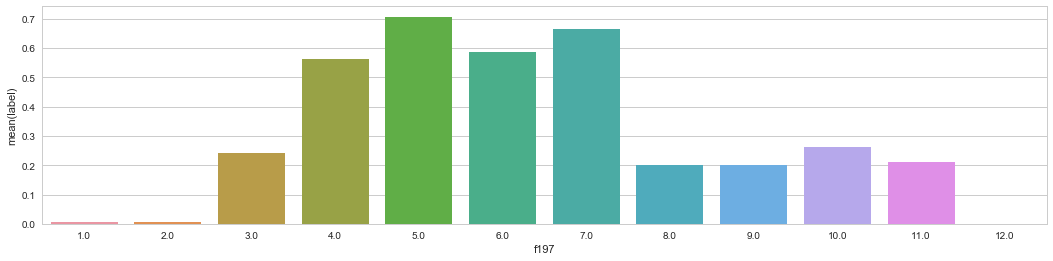

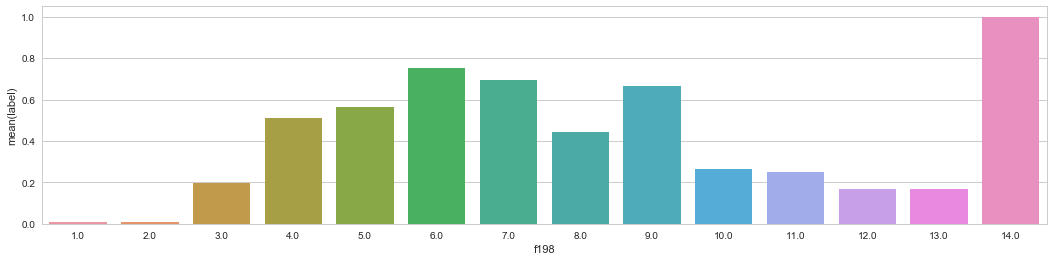

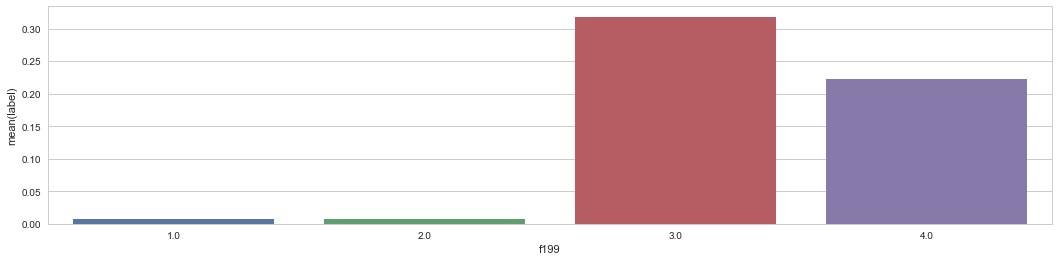

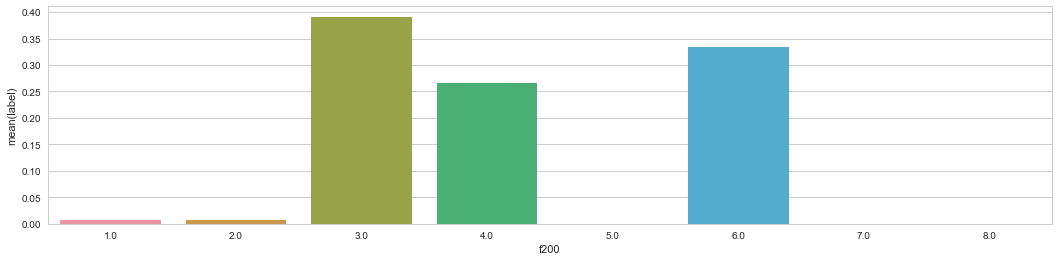

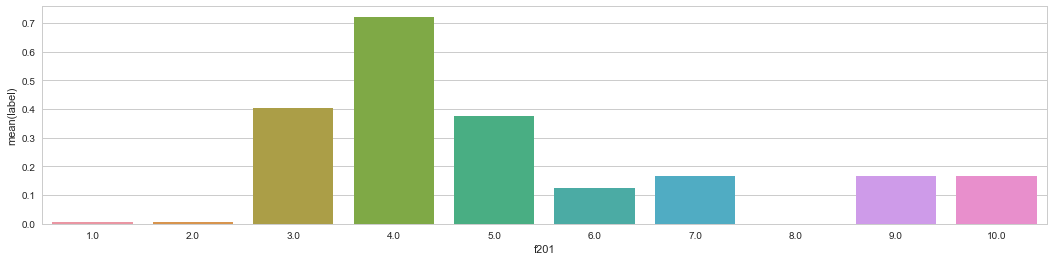

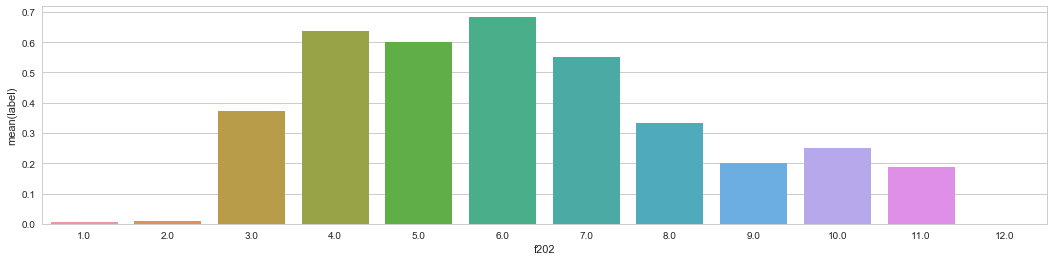

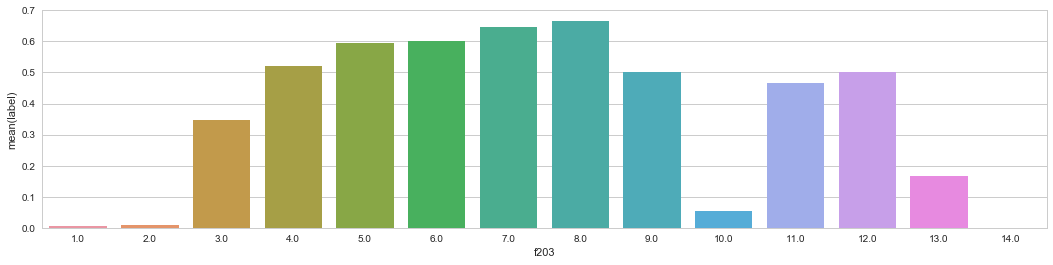

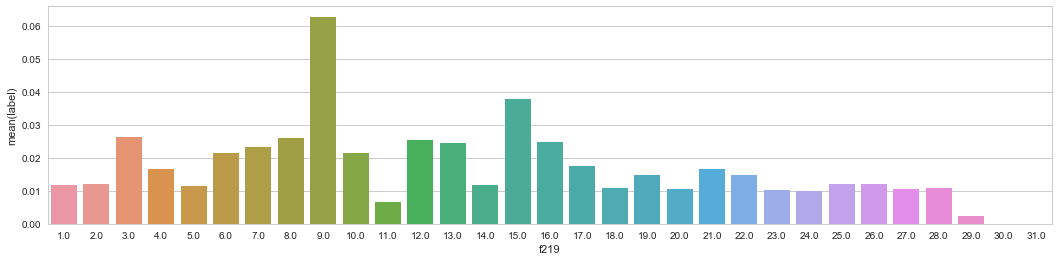

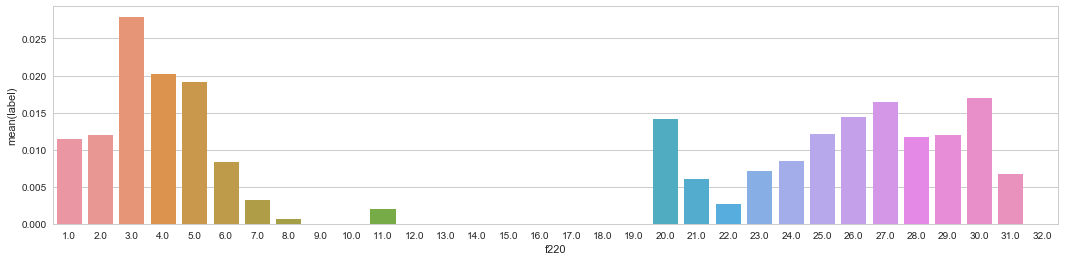

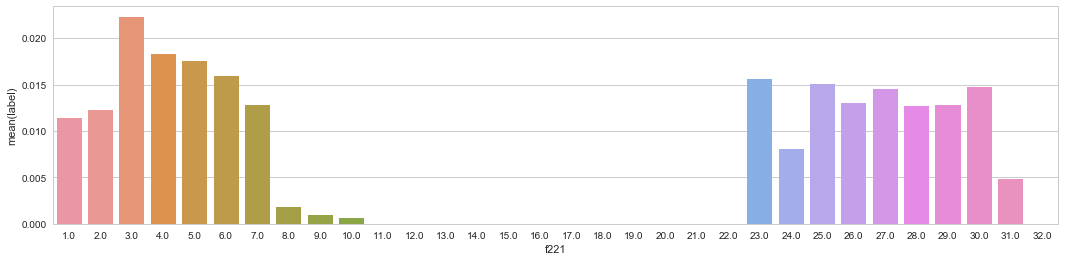

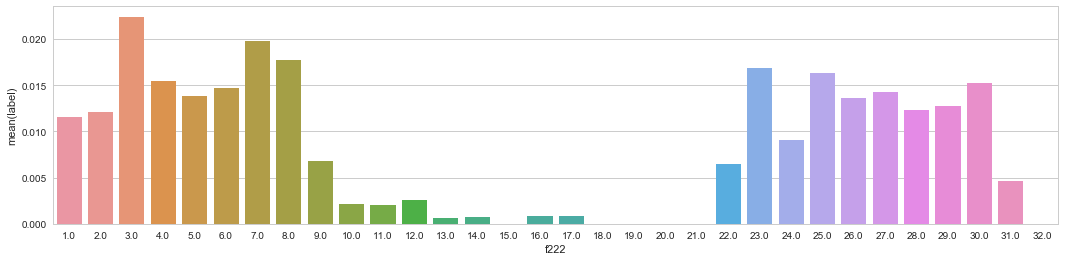

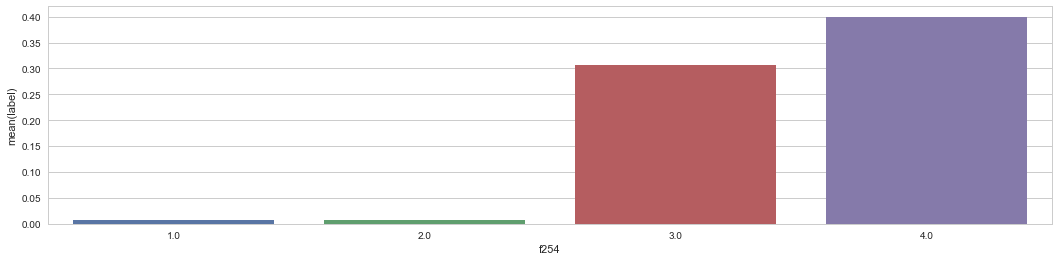

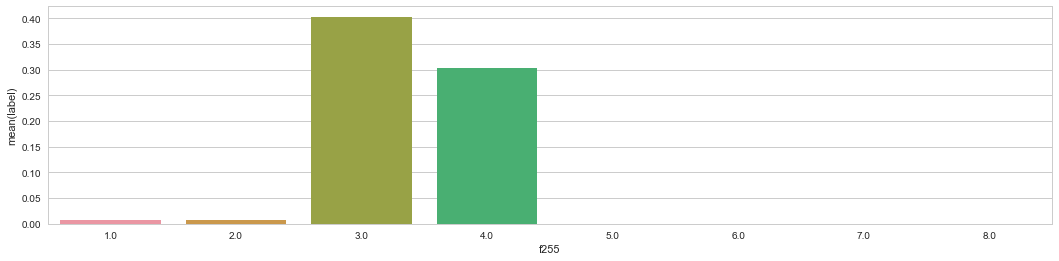

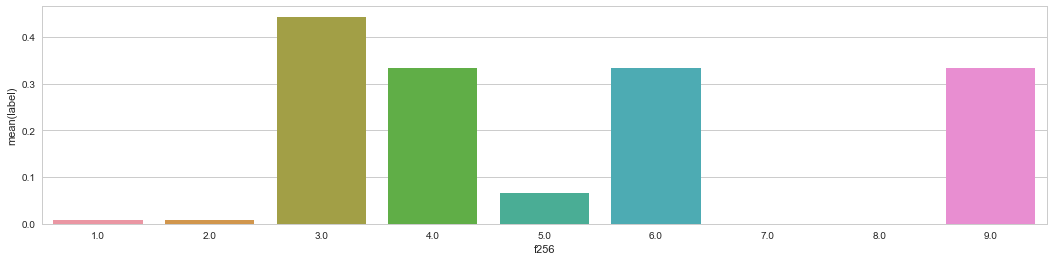

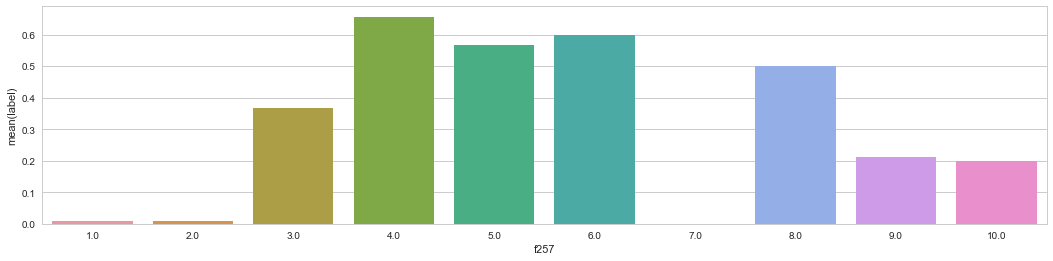

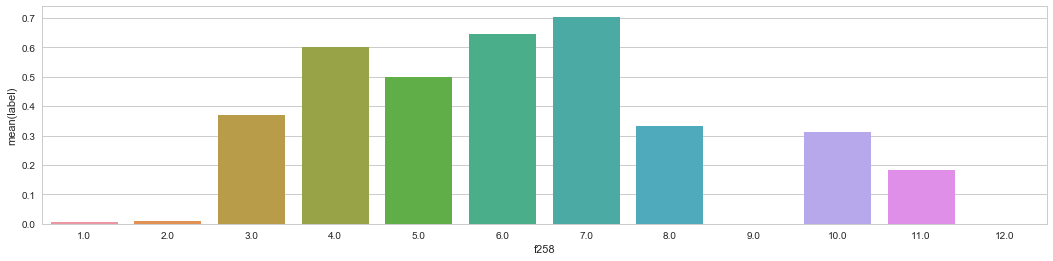

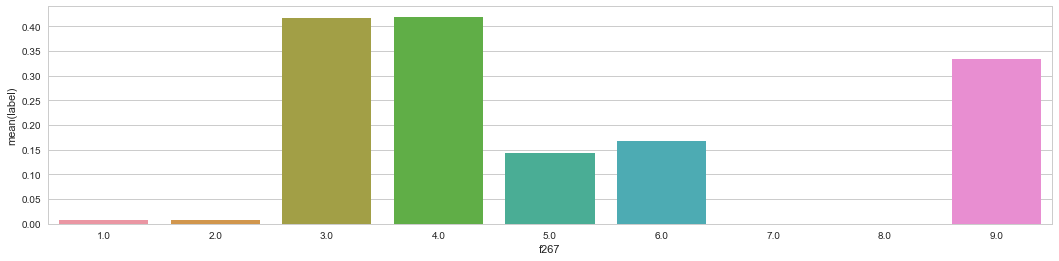

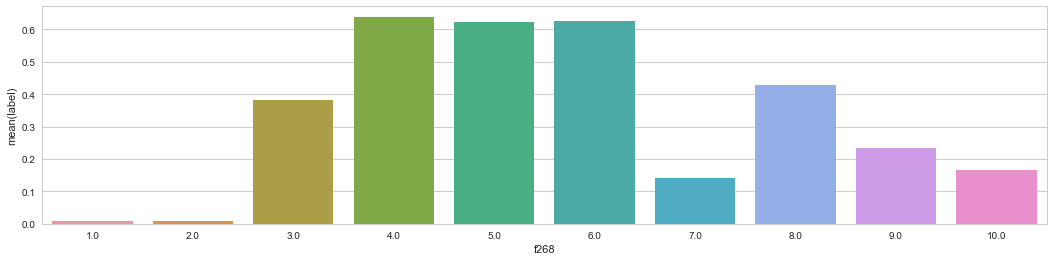

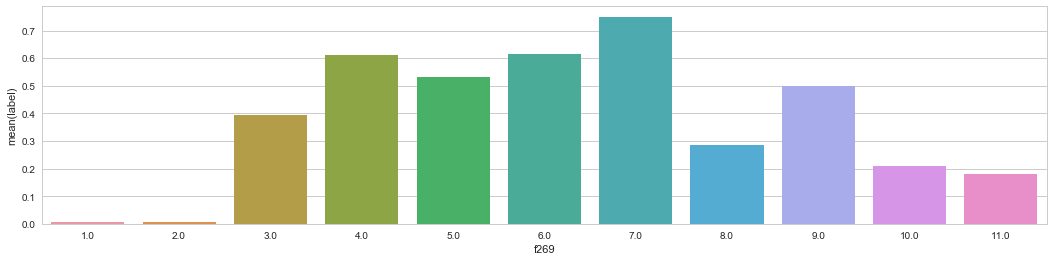

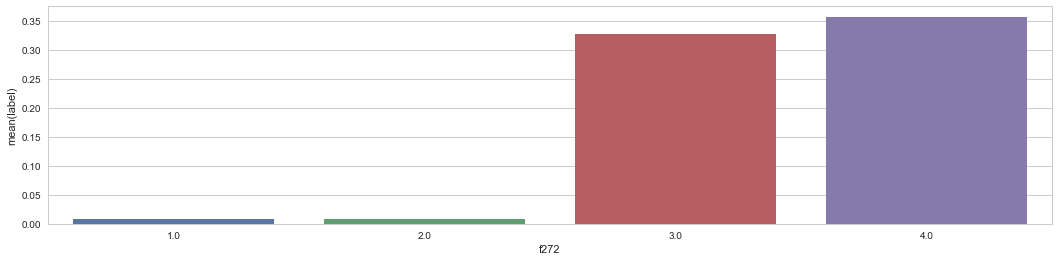

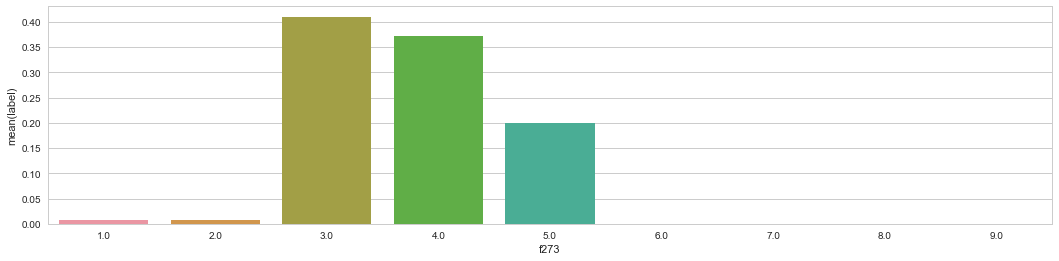

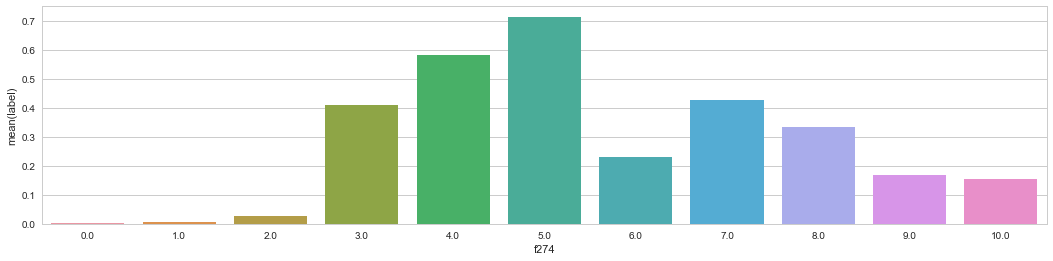

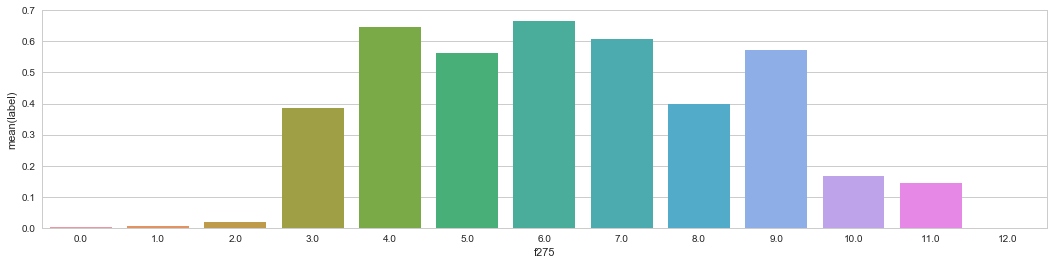

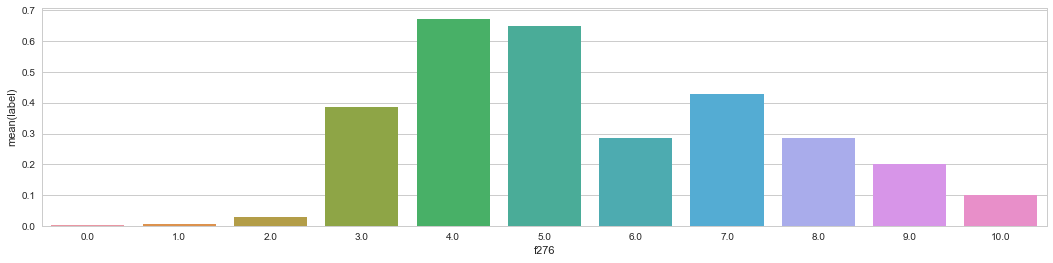

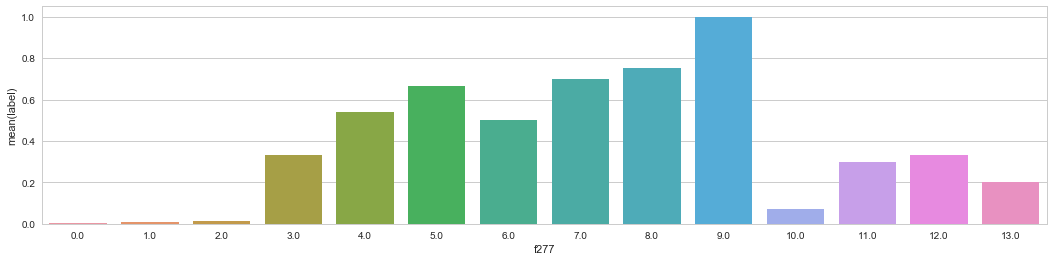

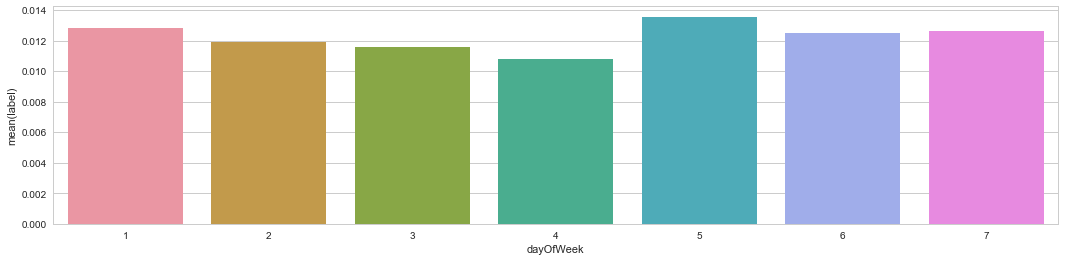

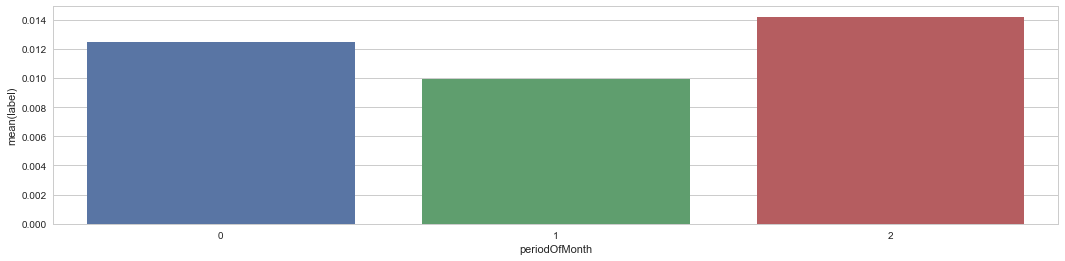

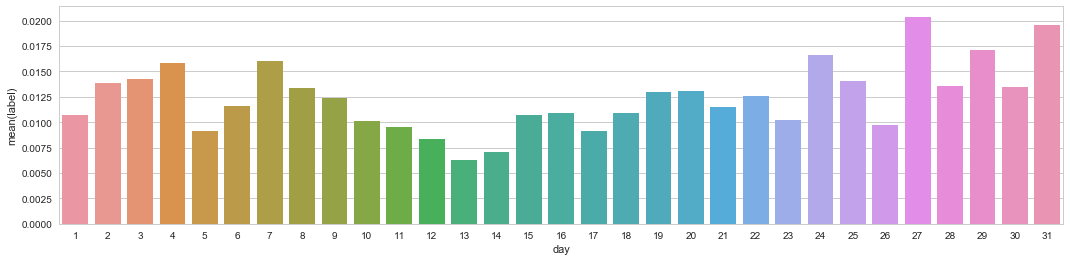

In [142]:
for index in list[1:]:
    plotNegativeSamplesPercent_By_UniqueInstances(date_df,index)